<img src ="https://drive.google.com/uc?id=1phvmMwNcfoNzLMYKGdx817-zJZam39Xr">

<img src = "https://drive.google.com/uc?id=1i0rLovNQv20By4CG8TBvhXJxlz68TxGJ">

# 1.제안배경

<img src = "https://drive.google.com/uc?id=1jDQXi-Nc-KnVu2SbU6D7wWS1lSwlnVqw">

<img src = "https://drive.google.com/uc?id=1TKPh1d1jsALihFHgogkYQ_ICwXpDzA8d">

<img src = "https://drive.google.com/uc?id=195xfY6WsNUeRqaTz-4KAkR0QPVWrENs1">

<img src = "https://drive.google.com/uc?id=1kTpJ4YTVslrQPYv64MHScEkjvmZMBJJL">

# 2.프로젝트 목표 및 서비스 제안

<img src = "https://drive.google.com/uc?id=1RHwY4oxKksJXEcy9hRyY0RWNRp3NmiZu">

- 현재 국내 상장리츠에 대한 개인투자자들이 의사결정에 활용할 수 있는 리츠 관련 정보의 경우 '부동산'중심의 시스템이며, 투자자들이 궁극적으로 원하는 미래에 대한 정보보단 지난달, 지난 분기등 과거에 대한 정보만 나열되어있다. 또한, 향후 상장리츠 시장이 활성화되고 시장 변동성 또환 증가할 것이라 예상되지만 현재는 부동산의 성격이 전혀 없는 주가 움직임에 대한 정보만을 제공하고 있는 것이다.

- 따라서, 본 팀은 부동산과 주식의 특성을 모두 결합 정보시스템을 제공하고자 실시간으로 부동산의 성격을 담을 수 있는 데이터를 바탕으로 단기적인 상장리츠 주가 움직임을 설명할 수 있는 서비스를 구현하고자 한다.

- 구체적으로, 리츠상품들과 관련된 거래정보 뿐만 아니라 부동산의 거시지표와 본 팀이 제작한 일단위 부동산 뉴스 심리지수를 사용하여 단기적인 움직임 일주일 뒤의 상장리츠 등락을 예측하는 모델을 제공할 계획이다.

<img src = "https://drive.google.com/uc?id=1PVi88dmBW31D1tvbTCcXPRitSfX8jsxc">

- 추가로 나아가서 본 팀의 비즈니스 컨텐츠인 상장리츠 등락예측 모형을 통해 위에서 언급한 주식뿐만이 아닌 부동산 성격을 담은 정보 서비스를 활용할 수 있게 되는 것 뿐만 아니라 추후 리츠시장의 활성화를 통해 다양한 파생상품이나 투자상품들이 생겨날 시 상장리츠 운용사나 증권사들이 활용할 수 있는 선제적인 비즈니스 아이디어로서 서비스 모델이 제안되었다.

# 3.예측 모델 및 서비스 개발

## 가. 기초 환경 설정

### 패키지 및 라이브러리

In [ ]:
## 글씨 깨짐 방지 -> 현재 셀을 한번 실행후 다시 런타임 시작 후 전체 셀을 진행해야함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## 구글 드라이브 설정
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/drive', force_remount=True)

## 패키지 설치
!pip install catboost
!pip install shap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
## 라이브러리 설치
import pandas as pd
import numpy as np
import os
import datetime as datetime
from dateutil import relativedelta

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

#전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 모델알고리즘
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import *
import shap

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[코드 실행환경] - Google colab
https://drive.google.com/drive/folders/1776aHlm9PlOV1nkVN1XLRUtKhaNuN0NK?usp=sharing

## 나. 데이터 수집

### 0) 분석 프레임워크
<img src = "https://drive.google.com/uc?id=1fuYhXycrREfXGb-iX2ToSZt-ZPctQkMx">

- 본 팀의 연구방식은 크게 4가지의 데이터 수집 및 파생변수 생성, 데이터 프레임 구축, 데이터 전처리, 모델 구축 및 활용의 과정으로 진행된다.

- 먼저, 데이터 수집에서는 상장리츠의 일자별 거래데이터를 바탕으로 상장리츠와 관련된 RSI,MACD등 테크니컬 지표를 생성하며 상장리츠 주식 데이터 셋을 구축하였으며 다음으로, 부동산 뉴스데이터를 크롤링하여 부동산 뉴스 심리지수를 산출하고 부동산 경기데이터와 결합하여 부동산 데이터셋을 구축하였다. 그 후, 코스피 지수를 바탕으로 관련 테크니컬 지표인 파생변수를 생성후 거시경제 데이터와 결합하여 최종적으로 상장리츠 주식데이터, 부동산 데이터, 거시경제 데이터 셋을 통합하며 DB를 구축했다.

- 다음으로, VIF와 다중공선성을 확인하여 불필요하다고 판단되는 변수를 제거하였으며 스케일링을 통해 변수간의 단위의 일관성을 유지하였다.

- 마지막으로, 분류에 안정적이고 우수한 성능을 Tree-based기반의 XGBoost,LightGBM,Catboost 모델을 사용하여 비즈니스 컨텐츠 서비스 활용에 사용한 후 XAI 기법인 SHAP를 통해 변수의 영향도를 파악하였다.



### 1) KRX 상장리츠 주식 시장 데이터

[데이터 목록 및 출처]

- 개별리츠주가 및 거래량 / 한국거래소 정보데이터시스템 http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201)

In [ ]:
data1 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/SK리츠.csv',encoding = 'cp949',thousands = ',')
data2 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/NH프라임리츠.csv',encoding = 'cp949',thousands = ',')
data3 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/NH올원리츠.csv',encoding = 'cp949',thousands = ',')
data4 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/ESR켄달스퀘어리츠.csv',encoding = 'cp949',thousands = ',')
data5 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/코람코에너지리츠.csv',encoding = 'cp949',thousands = ',')
data6 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/케이탑리츠.csv',encoding = 'cp949',thousands = ',')
data7 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/제이알글로벌리츠.csv',encoding = 'cp949',thousands = ',')
data8 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/이지스밸류리츠.csv',encoding = 'cp949',thousands = ',')
data9 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/이지스레지던스리츠.csv',encoding = 'cp949',thousands = ',')
data10 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/이리츠코크렙.csv',encoding = 'cp949',thousands = ',')
data11 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/에이리츠.csv',encoding = 'cp949',thousands = ',')
data12 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/신한알파리츠.csv',encoding = 'cp949',thousands = ',')
data13 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/신한서부티엔디리츠.csv',encoding = 'cp949',thousands = ',')
data14 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/미래에셋맵스리츠.csv',encoding = 'cp949',thousands = ',')
data15 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/미래에셋글로벌리츠.csv',encoding = 'cp949',thousands = ',')
data16 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/모두투어리츠.csv',encoding = 'cp949',thousands = ',')
data17 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/롯데리츠.csv',encoding = 'cp949',thousands = ',')
data18 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/디앤디플랫폼리츠.csv',encoding = 'cp949',thousands = ',')
data19 = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/코람코더원리츠.csv',encoding = 'cp949',thousands = ',')

In [ ]:
data1['종목명'] = 'SK리츠' 
data2['종목명'] = 'NH프라임리츠'
data3['종목명'] = 'NH올원리츠'
data4['종목명'] = 'ESR켄달스퀘어리츠' 
data5['종목명'] = '코람코에너지리츠'
data6['종목명'] = '케이탑리츠'
data7['종목명'] =  '제이알글로벌리츠'
data8['종목명'] = '이지스밸류리츠'
data9['종목명'] = '이지스레지던스리츠'
data10['종목명'] = '이리츠코크렙'
data11['종목명'] = '에이리츠'
data12['종목명'] = '신한알파리츠'
data13['종목명'] = '신한서부티엔디리츠'
data14['종목명'] = '미래에셋맵스리츠'
data15['종목명'] = '미래에셋글로벌리츠'
data16['종목명'] = '모두투어리츠'
data17['종목명'] = '롯데리츠'
data18['종목명'] = '디앤디플랫폼리츠'
data19['종목명'] = '코람코더원리츠'

In [ ]:
## SK리츠
data1

,Item Name,수정고가(원),수정저가(원),수정주가(원),거래량(주),종목명
0,2021-09-14,6380,5320,5780,82005002,SK리츠
1,2021-09-15,6010,5580,5790,10380863,SK리츠
2,2021-09-16,5870,5710,5740,3076596,SK리츠
3,2021-09-17,5790,5570,5770,3200578,SK리츠
4,2021-09-23,5740,5620,5700,1473333,SK리츠
...,...,...,...,...,...,...
169,2022-05-25,7240,7130,7210,241433,SK리츠
170,2022-05-26,7290,7190,7280,275510,SK리츠
171,2022-05-27,7290,7140,7180,239025,SK리츠
172,2022-05-30,7180,7000,7000,487806,SK리츠


In [ ]:
reit_df_set=[]
for i in range(1,20):
        reit_df_set.append(globals()['data{}'.format(i)])

In [ ]:
# 개별리츠의 주식거래 데이터를 이용해 기술적 지표(technical index) 생성

##개별리츠 - RSI
def RSI(df):
  RSI_n=14
  test = df.copy()
  test["등락"]=[test.loc[i,"수정주가(원)"] - test.loc[i-1,"수정주가(원)"] if i>0 else 0 for i in range(len(df))] 
  # i가 0일때는 전일값이 없어서 제외함, i는 데이터프레임의 index값
  
  # U(up): n일 동안의 종가 상승 분
  test["RSI_U"]=test["등락"].apply(lambda x: x if x>0 else 0)
  
  # D(down): n일 동안의 종가 하락 분 --> 음수를 양수로 바꿔줌
  test["RSI_D"]=test["등락"].apply(lambda x: x * (-1) if x<0 else 0)
  
  # AU(average ups): U값의 평균
  test["RSI_AU"]=test["RSI_U"].rolling(RSI_n).mean()
  
  # DU(average downs): D값의 평균
  test["RSI_AD"]=test["RSI_D"].rolling(RSI_n).mean()
  
  df["RSI"] = test.apply(lambda x:x["RSI_AU"]/(x["RSI_AU"]+ x["RSI_AD"]) * 100,1)

  return df

for i in reit_df_set:
  RSI(i)


In [ ]:
## 개별리츠 - MFI
def MFI(df):
  typical_price = (df['수정고가(원)'] + df['수정저가(원)'] + df['수정주가(원)'])/3
  money_flow = typical_price * df['거래량(주)']
  positive_flow = []
  negative_flow = []
  for i in range(1,len(typical_price)):
    if typical_price[i] > typical_price[i-1]:
      positive_flow.append(money_flow[i-1])
      negative_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
      negative_flow.append(money_flow[i-1])
      positive_flow.append(0)
    else:
      positive_flow.append(0)
      negative_flow.append(0)
  period = 14
  positive_mf = []
  negative_mf = []

  for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period : i+1]))
  for i in range(period-1, len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period : i+1]))
  mfi = 100 * (np.array(positive_mf)/ (np.array(positive_mf) + np.array(negative_mf)))
  
  for _ in range(14):
    mfi = np.insert(mfi,0, 0)
  df['MFI'] = mfi
  return df
period = 14
for i in reit_df_set:
  MFI(i)

In [ ]:
## 개별리츠 - MACD
def MACD(df):
  test = df.copy()
  macd_short, macd_long, = 6,12 #기본값

  test["MACD_short"]=test["수정주가(원)"].ewm(span=macd_short).mean()

  test["MACD_long"]=test["수정주가(원)"].ewm(span=macd_long).mean()

  df["MACD"]=test.apply(lambda x: (x["MACD_short"]-x["MACD_long"]), axis=1)
  return df
for i in reit_df_set:
  MACD(i)

In [ ]:
## 개별리츠 - 모멘텀
def momentum(df):
  for i in range(len(df)):
      if i>10:
          df.loc[i, '모멘텀'] = df.loc[i, '수정주가(원)'] / df.loc[i-10, '수정주가(원)']
      else:
          0
  return df
for i in reit_df_set:
  momentum(i)

In [ ]:
## 개별리츠 - 윌리엄스 퍼센트R
def WillR(df, n_days=14):
    
    low_min = df['수정저가(원)'].rolling(window=n_days, center=False).min()
    high_max = df['수정고가(원)'].rolling(window=n_days, center=False).max()
    
    df['willr'] = (high_max - df['수정주가(원)']) / (high_max - low_min)
    return df

for i in reit_df_set:
  WillR(i,14)

In [ ]:
## 개별리츠 - PSY
def PSY(df):
  test = df.copy()
  test['uptrend'] = 0
  for i in range(1,len(test)):
    if test.loc[i, '수정주가(원)'] - test.loc[i-1, '수정주가(원)'] > 0:
      test.loc[i, 'UP'] = 1
    else : 
      test.loc[i, 'UP'] = 0
              
  for i in range(12,len(test)):
    value = sum(test['UP'].iloc[i-12:i])
    test['uptrend'].iloc[i] = value
  df['PSY'] = test['uptrend']/12 

  return df
for i in reit_df_set:
  PSY(i)

In [ ]:
data1

,Item Name,수정고가(원),수정저가(원),수정주가(원),거래량(주),종목명,RSI,MFI,MACD,모멘텀,willr,PSY
0,2021-09-14,6380,5320,5780,82005002,SK리츠,NaN,0.000000,0.000000,NaN,NaN,0.000000
1,2021-09-15,6010,5580,5790,10380863,SK리츠,NaN,0.000000,0.416667,NaN,NaN,0.000000
2,2021-09-16,5870,5710,5740,3076596,SK리츠,NaN,0.000000,-2.461173,NaN,NaN,0.000000
3,2021-09-17,5790,5570,5770,3200578,SK리츠,NaN,0.000000,-1.347468,NaN,NaN,0.000000
4,2021-09-23,5740,5620,5700,1473333,SK리츠,NaN,0.000000,-6.298548,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
169,2022-05-25,7240,7130,7210,241433,SK리츠,64.000000,68.425301,61.740890,1.064993,0.051724,0.666667
170,2022-05-26,7290,7190,7280,275510,SK리츠,65.714286,79.622939,76.192583,1.070588,0.015873,0.750000
171,2022-05-27,7290,7140,7180,239025,SK리츠,60.000000,70.135961,68.391186,1.037572,0.174603,0.833333
172,2022-05-30,7180,7000,7000,487806,SK리츠,63.888889,66.414303,36.933586,0.994318,0.467742,0.750000


### 2) 코스피 지표 데이터

[데이터 목록 및 출처]

- 코스피 지수 데이터 / 한국거래소 정보데이터시스템 (http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201))

- PER ,PBR / 한국거래소 정보데이터시스템 (http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201)

In [ ]:
# 코스피 지수 데이터
kospi = pd.read_csv('./drive/MyDrive/krx 빅데이터/RAW 개별리츠,코스피/코스피.csv',encoding = 'cp949',thousands = ',')
per_pbr = pd.read_csv('./drive/MyDrive/krx 빅데이터/거시 경제,부동산 경기/PER PBR.csv',encoding = 'cp949')
per_pbr.set_index('Unnamed: 0',inplace =True)

In [ ]:
kospi = pd.merge(kospi , per_pbr,how='left', left_on='Item Name', right_on=per_pbr.index)
kospi

,Item Name,고가지수(포인트),저가지수(포인트),종가지수(포인트),거래량(주),종목수 (상승),종목수 (하락),종가지수 (5일 평균)(포인트),종가지수 (20일 평균)(포인트),종가지수 (60일 평균)(포인트),수익률 (1개월)(%),수익률 (3개월)(%),수익률 (6개월)(%),PER,PBR
0,2018-01-02,2481.02,2465.94,2479.65,262205400,498,305,2450.34,2468.32,2493.29,0.17,3.56,3.67,13.06,1.12
1,2018-01-03,2493.40,2481.91,2486.35,331094600,401,409,2459.50,2468.87,2495.17,0.44,3.84,3.84,13.09,1.12
2,2018-01-04,2502.50,2466.45,2466.46,333836300,271,548,2467.32,2467.11,2496.37,-1.41,3.01,3.61,12.99,1.11
3,2018-01-05,2497.52,2475.51,2497.52,308769600,493,298,2479.49,2466.48,2497.44,-0.50,4.30,4.57,13.15,1.12
4,2018-01-08,2515.37,2494.18,2513.28,311429300,337,474,2488.65,2468.42,2498.35,2.00,4.96,5.61,13.23,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2022-05-25,2630.17,2602.94,2617.22,712611400,485,360,2620.42,2629.53,2678.82,-1.50,-2.22,-12.18,10.83,1.05
1083,2022-05-26,2641.91,2602.01,2612.45,595849200,395,422,2624.44,2628.20,2677.38,-2.09,-2.40,-11.03,10.81,1.05
1084,2022-05-27,2644.71,2631.49,2638.05,590813700,638,201,2624.19,2626.73,2676.29,-0.04,-1.45,-10.16,10.92,1.06
1085,2022-05-30,2672.74,2654.18,2669.66,469797600,712,154,2628.65,2625.46,2675.00,-0.94,-1.09,-5.97,11.05,1.07


In [ ]:
# 코스피 지수데이터 기반 파생변수 생성 

## 코스피 - RSI
def RSI(df):
  RSI_n=14
  test = df.copy()
  test["등락"]=[test.loc[i,"종가지수(포인트)"] - test.loc[i-1,"종가지수(포인트)"] if i>0 else 0 for i in range(len(df))] 
  # i가 0일때는 전일값이 없어서 제외함, i는 데이터프레임의 index값
  
  # U(up): n일 동안의 종가 상승 분
  test["RSI_U"]=test["등락"].apply(lambda x: x if x>0 else 0)
  
  # D(down): n일 동안의 종가 하락 분 --> 음수를 양수로 바꿔줌
  test["RSI_D"]=test["등락"].apply(lambda x: x * (-1) if x<0 else 0)
  
  # AU(average ups): U값의 평균
  test["RSI_AU"]=test["RSI_U"].rolling(RSI_n).mean()
  
  # DU(average downs): D값의 평균
  test["RSI_AD"]=test["RSI_D"].rolling(RSI_n).mean()
  
  df["코스피_RSI"] = test.apply(lambda x:x["RSI_AU"]/(x["RSI_AU"]+ x["RSI_AD"]) * 100,1)

  return df

RSI(kospi)


,Item Name,고가지수(포인트),저가지수(포인트),종가지수(포인트),거래량(주),종목수 (상승),종목수 (하락),종가지수 (5일 평균)(포인트),종가지수 (20일 평균)(포인트),종가지수 (60일 평균)(포인트),수익률 (1개월)(%),수익률 (3개월)(%),수익률 (6개월)(%),PER,PBR,코스피_RSI
0,2018-01-02,2481.02,2465.94,2479.65,262205400,498,305,2450.34,2468.32,2493.29,0.17,3.56,3.67,13.06,1.12,NaN
1,2018-01-03,2493.40,2481.91,2486.35,331094600,401,409,2459.50,2468.87,2495.17,0.44,3.84,3.84,13.09,1.12,NaN
2,2018-01-04,2502.50,2466.45,2466.46,333836300,271,548,2467.32,2467.11,2496.37,-1.41,3.01,3.61,12.99,1.11,NaN
3,2018-01-05,2497.52,2475.51,2497.52,308769600,493,298,2479.49,2466.48,2497.44,-0.50,4.30,4.57,13.15,1.12,NaN
4,2018-01-08,2515.37,2494.18,2513.28,311429300,337,474,2488.65,2468.42,2498.35,2.00,4.96,5.61,13.23,1.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2022-05-25,2630.17,2602.94,2617.22,712611400,485,360,2620.42,2629.53,2678.82,-1.50,-2.22,-12.18,10.83,1.05,41.623872
1083,2022-05-26,2641.91,2602.01,2612.45,595849200,395,422,2624.44,2628.20,2677.38,-2.09,-2.40,-11.03,10.81,1.05,45.171105
1084,2022-05-27,2644.71,2631.49,2638.05,590813700,638,201,2624.19,2626.73,2676.29,-0.04,-1.45,-10.16,10.92,1.06,54.205521
1085,2022-05-30,2672.74,2654.18,2669.66,469797600,712,154,2628.65,2625.46,2675.00,-0.94,-1.09,-5.97,11.05,1.07,60.711564


In [ ]:
## 코스피 - MACD
def MACD(df):
  test = df.copy()
  macd_short, macd_long, = 12,26 #기본값

  test["MACD_short"]=test["종가지수(포인트)"].ewm(span=macd_short).mean()

  test["MACD_long"]=test["종가지수(포인트)"].ewm(span=macd_long).mean()

  df["코스피_MACD"]=test.apply(lambda x: (x["MACD_short"]-x["MACD_long"]), axis=1)
  return df
MACD(kospi)

,Item Name,고가지수(포인트),저가지수(포인트),종가지수(포인트),거래량(주),종목수 (상승),종목수 (하락),종가지수 (5일 평균)(포인트),종가지수 (20일 평균)(포인트),종가지수 (60일 평균)(포인트),수익률 (1개월)(%),수익률 (3개월)(%),수익률 (6개월)(%),PER,PBR,코스피_RSI,코스피_MACD
0,2018-01-02,2481.02,2465.94,2479.65,262205400,498,305,2450.34,2468.32,2493.29,0.17,3.56,3.67,13.06,1.12,NaN,0.000000
1,2018-01-03,2493.40,2481.91,2486.35,331094600,401,409,2459.50,2468.87,2495.17,0.44,3.84,3.84,13.09,1.12,NaN,0.150321
2,2018-01-04,2502.50,2466.45,2466.46,333836300,271,548,2467.32,2467.11,2496.37,-1.41,3.01,3.61,12.99,1.11,NaN,-0.425250
3,2018-01-05,2497.52,2475.51,2497.52,308769600,493,298,2479.49,2466.48,2497.44,-0.50,4.30,4.57,13.15,1.12,NaN,0.444801
4,2018-01-08,2515.37,2494.18,2513.28,311429300,337,474,2488.65,2468.42,2498.35,2.00,4.96,5.61,13.23,1.13,NaN,1.535336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2022-05-25,2630.17,2602.94,2617.22,712611400,485,360,2620.42,2629.53,2678.82,-1.50,-2.22,-12.18,10.83,1.05,41.623872,-18.906331
1083,2022-05-26,2641.91,2602.01,2612.45,595849200,395,422,2624.44,2628.20,2677.38,-2.09,-2.40,-11.03,10.81,1.05,45.171105,-18.248872
1084,2022-05-27,2644.71,2631.49,2638.05,590813700,638,201,2624.19,2626.73,2676.29,-0.04,-1.45,-10.16,10.92,1.06,54.205521,-15.483639
1085,2022-05-30,2672.74,2654.18,2669.66,469797600,712,154,2628.65,2625.46,2675.00,-0.94,-1.09,-5.97,11.05,1.07,60.711564,-10.619099


In [ ]:
## 코스피 - 모멘텀
def MOMENTUM(df):
  test = df.copy()
  test['코스피모멘텀'] = (test['수익률 (6개월)(%)']*0.6) + (test['수익률 (3개월)(%)']*0.3) + (test['수익률 (1개월)(%)']*0.1)
  
  return test
MOMENTUM(kospi)

,Item Name,고가지수(포인트),저가지수(포인트),종가지수(포인트),거래량(주),종목수 (상승),종목수 (하락),종가지수 (5일 평균)(포인트),종가지수 (20일 평균)(포인트),종가지수 (60일 평균)(포인트),수익률 (1개월)(%),수익률 (3개월)(%),수익률 (6개월)(%),PER,PBR,코스피_RSI,코스피_MACD,코스피모멘텀
0,2018-01-02,2481.02,2465.94,2479.65,262205400,498,305,2450.34,2468.32,2493.29,0.17,3.56,3.67,13.06,1.12,NaN,0.000000,3.287
1,2018-01-03,2493.40,2481.91,2486.35,331094600,401,409,2459.50,2468.87,2495.17,0.44,3.84,3.84,13.09,1.12,NaN,0.150321,3.500
2,2018-01-04,2502.50,2466.45,2466.46,333836300,271,548,2467.32,2467.11,2496.37,-1.41,3.01,3.61,12.99,1.11,NaN,-0.425250,2.928
3,2018-01-05,2497.52,2475.51,2497.52,308769600,493,298,2479.49,2466.48,2497.44,-0.50,4.30,4.57,13.15,1.12,NaN,0.444801,3.982
4,2018-01-08,2515.37,2494.18,2513.28,311429300,337,474,2488.65,2468.42,2498.35,2.00,4.96,5.61,13.23,1.13,NaN,1.535336,5.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2022-05-25,2630.17,2602.94,2617.22,712611400,485,360,2620.42,2629.53,2678.82,-1.50,-2.22,-12.18,10.83,1.05,41.623872,-18.906331,-8.124
1083,2022-05-26,2641.91,2602.01,2612.45,595849200,395,422,2624.44,2628.20,2677.38,-2.09,-2.40,-11.03,10.81,1.05,45.171105,-18.248872,-7.547
1084,2022-05-27,2644.71,2631.49,2638.05,590813700,638,201,2624.19,2626.73,2676.29,-0.04,-1.45,-10.16,10.92,1.06,54.205521,-15.483639,-6.535
1085,2022-05-30,2672.74,2654.18,2669.66,469797600,712,154,2628.65,2625.46,2675.00,-0.94,-1.09,-5.97,11.05,1.07,60.711564,-10.619099,-4.003


In [ ]:
## 코스피 - 이격도(5일)
kospi['이격도(5)'] = kospi['종가지수(포인트)'] - kospi['종가지수 (5일 평균)(포인트)']

## 코스피 - 이격도(20일)
kospi['이격도(20)'] = kospi['종가지수(포인트)'] - kospi['종가지수 (20일 평균)(포인트)']

## 코스피 - 상승하락비율
kospi['상승하락비율'] = kospi['종목수 (상승)'] /  kospi['종목수 (하락)'] 

In [ ]:
kospi

,Item Name,고가지수(포인트),저가지수(포인트),종가지수(포인트),거래량(주),종목수 (상승),종목수 (하락),종가지수 (5일 평균)(포인트),종가지수 (20일 평균)(포인트),종가지수 (60일 평균)(포인트),수익률 (1개월)(%),수익률 (3개월)(%),수익률 (6개월)(%),PER,PBR,코스피_RSI,코스피_MACD,이격도(5),이격도(20),상승하락비율
0,2018-01-02,2481.02,2465.94,2479.65,262205400,498,305,2450.34,2468.32,2493.29,0.17,3.56,3.67,13.06,1.12,NaN,0.000000,29.31,11.33,1.632787
1,2018-01-03,2493.40,2481.91,2486.35,331094600,401,409,2459.50,2468.87,2495.17,0.44,3.84,3.84,13.09,1.12,NaN,0.150321,26.85,17.48,0.980440
2,2018-01-04,2502.50,2466.45,2466.46,333836300,271,548,2467.32,2467.11,2496.37,-1.41,3.01,3.61,12.99,1.11,NaN,-0.425250,-0.86,-0.65,0.494526
3,2018-01-05,2497.52,2475.51,2497.52,308769600,493,298,2479.49,2466.48,2497.44,-0.50,4.30,4.57,13.15,1.12,NaN,0.444801,18.03,31.04,1.654362
4,2018-01-08,2515.37,2494.18,2513.28,311429300,337,474,2488.65,2468.42,2498.35,2.00,4.96,5.61,13.23,1.13,NaN,1.535336,24.63,44.86,0.710970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2022-05-25,2630.17,2602.94,2617.22,712611400,485,360,2620.42,2629.53,2678.82,-1.50,-2.22,-12.18,10.83,1.05,41.623872,-18.906331,-3.20,-12.31,1.347222
1083,2022-05-26,2641.91,2602.01,2612.45,595849200,395,422,2624.44,2628.20,2677.38,-2.09,-2.40,-11.03,10.81,1.05,45.171105,-18.248872,-11.99,-15.75,0.936019
1084,2022-05-27,2644.71,2631.49,2638.05,590813700,638,201,2624.19,2626.73,2676.29,-0.04,-1.45,-10.16,10.92,1.06,54.205521,-15.483639,13.86,11.32,3.174129
1085,2022-05-30,2672.74,2654.18,2669.66,469797600,712,154,2628.65,2625.46,2675.00,-0.94,-1.09,-5.97,11.05,1.07,60.711564,-10.619099,41.01,44.20,4.623377


### 3) 거시 경제 지표 데이터

[데이터 목록 및 출처]

- 시장금리 국고채(10년) / 한국은행 경제통계시스템 (https://ecos.bok.or.kr/#/SearchStat)

- 소비자물가지수 /통계청 (https://kosis.kr/statHtml/statHtml.do?orgId=390&tblId=DT_39002_01&conn_path=I2)

- 경기종합지수 / OECD 홈페이지 (https://data.oecd.org/leadind/composite-leading-indicator-cli.htm)

In [ ]:
macro_data = pd.read_csv("./drive/MyDrive/krx 빅데이터/거시 경제,부동산 경기/거시 경제 데이터.csv",encoding = 'cp949')
macro_data.rename(columns = {'Unnamed: 0' : 'date'} ,inplace = True)

In [ ]:
macro_data

,date,시장금리 국고채(10년),소비자물가지수,경기종합지수
0,2019-01-02,1.948,99.33,99.43
1,2019-01-03,1.955,99.33,99.43
2,2019-01-04,1.972,99.33,99.43
3,2019-01-07,1.977,99.33,99.43
4,2019-01-08,1.994,99.33,99.43
...,...,...,...,...
838,2022-05-25,3.177,106.85,99.31
839,2022-05-26,3.238,106.85,99.31
840,2022-05-27,3.212,106.85,99.31
841,2022-05-30,3.211,106.85,99.31


### 4) 부동산 경제지표 데이터

[데이터 목록 및 출처]
- 주택매매가격지수 / 한국은행 경제통계시스템 (https://ecos.bok.or.kr/#/SearchStat)

- 부동산 소비 심리 지수 / 통계청 (https://kosis.kr/statHtml/statHtml.do?orgId=390&tblId=DT_39002_01&conn_path=I2)

- 매매가격지수 / 한국부동산원 (https://www.reb.or.kr/r-one/statistics/statisticsViewer.do)

- 주택매매건수 / 한국부동산원 (https://www.reb.or.kr/r-one/statistics/statisticsViewer.do)


In [ ]:
real_estate_data = pd.read_csv("./drive/MyDrive/krx 빅데이터/거시 경제,부동산 경기/부동산 경기 데이터.csv",encoding = 'cp949')

real_estate_data.rename(columns = {'Unnamed: 0' : 'date'} ,inplace = True)
real_estate_data.drop(['Unnamed: 5','Unnamed: 6'],axis=1 ,inplace = True)

In [ ]:
real_estate_data

,date,주택매매가격지수 (KB),부동산 소비 심리 지수,월간_매매가격지수_종합,주택매매전체건수
0,2019-01-02,79.799,96.1,90.651089,64804
1,2019-01-03,79.799,96.1,90.651089,64804
2,2019-01-04,79.799,96.1,90.651089,64804
3,2019-01-07,79.799,96.1,90.651089,64804
4,2019-01-08,79.799,96.1,90.651089,64804
...,...,...,...,...,...
838,2022-05-25,100.517,108.9,104.829611,53461
839,2022-05-26,100.517,108.9,104.829611,53461
840,2022-05-27,100.517,108.9,104.829611,53461
841,2022-05-30,100.517,108.9,104.829611,53461


### 5) 부동산 뉴스 데이터

- 주택,물류,리테일,오피스 4개 부동산 섹터를 키워드로 검색된 네이버 뉴스의 본문,기사,제목,링크를 크롤링하여 일단위로 정리하였다. 
- 아래의 크롤링 과정은 외부로컬환경에서 진행하여 뉴스 데이터를 가져왔다.

In [ ]:
## 섹터별 네이버 부동산 뉴스 크롤링

def crawler(maxpage, query, s_date, e_date):
    """
    검색어를 바탕으로 특정 기간에 해당하는 네이버 뉴스의 날짜,제목,본문,링크를 가져옴
    """
    naver_urls = []
    s_from = s_date.replace(".", "")
    e_to = e_date.replace(".", "")
    page = 1
    maxpage_t =(int(maxpage)-1)*10+1    
    
    while page < maxpage_t:
        
        url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + query + "&ds=" + s_date + "&de=" + e_date +  "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + "%2Ca%3A&start=" + str(page)
        # ua = UserAgent()
        # headers = {'User-Agent' : ua.random}

        req = requests.get(url)
        
        cont = req.content
        soup = BeautifulSoup(cont, 'html.parser')
        
        for urls in soup.select("a.info"):


            try:
                if "news.naver.com" in urls['href']:
                    naver_urls.append(urls['href'])
                  
            except Exception as e:
                continue
        page += 10
        
    return naver_urls
    
max_page = 400 ## 크롤링 할 최대 페이지
query = '주택 부동산' ## 섹터별 단어 설정
s_date = '2019.01.01'
e_date = '2019.01.31'
year = ['2019'.'2020','2021']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
for j in list(range(0,3)):
    s_date = s_date.split(".")
    s_date[0] = year[j]
    s_date = ".".join(s_date)
    
    e_date = e_date.split(".")
    e_date[0] = year[j]
    e_date = ".".join(e_date)
    for i in list(range(0,12)):
        s_date = s_date.split(".")
        s_date[1] = month[i]
        s_date =  ".".join(s_date)

        
        e_date = e_date.split(".")
        e_date[1] = month[i]
        e_date =  ".".join(e_date)
        
        total_urls = crawler(max_page,query,s_date,e_date)
        
        
        total_urls = list(set(total_urls))
        
        # ConnectionError방지

        headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/98.0.4758.102" }


        titles = []
        contents=[]
        dates = []
        result_url = []
        for i in tqdm(total_urls):
            original_html = requests.get(i,headers=headers)
            html = BeautifulSoup(original_html.text, "html.parser")
            
            ## 날짜가져오기
            try :
                html_date = html.select_one("div#ct> div.media_end_head.go_trans > div.media_end_head_info.nv_notrans > div.media_end_head_info_datestamp > div > span")
                news_date = html_date.attrs['data-date-time']
                dates.append(news_date)
            except :
                continue
            result_url.append(i)


            #뉴스 제목 가져오기
            title = html.select("div#ct > div.media_end_head.go_trans > div.media_end_head_title > h2")
            # list합치기
            title = ''.join(str(title))
            # html태그제거
            pattern1 = '<[^>]*>'
            title = re.sub(pattern=pattern1,repl='',string=title)
            titles.append(title)

            #뉴스 본문 가져오기

            content = html.select("div#dic_area")

            # 기사 텍스트만 가져오기
            # list합치기
            content = ''.join(str(content))

            #html태그제거 및 텍스트 다듬기
            content = re.sub(pattern=pattern1,repl='',string=content)
            pattern2 = """[\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}"""
            content = content.replace(pattern2,'')

            contents.append(content)







        news_df = pd.DataFrame({'date' : dates,'title': titles, 'link': result_url, 'content': contents})
        news_df.to_csv(f"news_{query}from_{s_date}to_{e_date}.csv" ,index=False, encoding='utf-8-sig')

### 6) 종속 변수 생성
- 개별 상장리츠 종목의 단기적인 움직임을 예측할 수 있는 정보를 제공하기 위해 해당 리츠 상품의 일주일 뒤 종가의 등락을 기준으로 당일 대비 일주일 뒤 종가가 상승했다면 종속변수 값은 1 하락했다면 0 으로 분류하였다.
- 주식시장 성격상 주말은 휴장일이기에 5거래일 뒤를 일주일 뒤라고 판단하였다.

In [ ]:
def target(df):
  df['target'] = 0
  for i in list(range(len(df))):
    try :
      value = df['수정주가(원)'].iloc[i]
      next_week = df['수정주가(원)'].iloc[i+5]
      if next_week > value:
        df['target'].iloc[i] = 1 
      else: 
        df['target'].iloc[i] = 0
    except :
      break
  return df
for i in reit_df_set:
  target(i)

In [ ]:
reit_df =pd.concat(reit_df_set,ignore_index=True)
reit_df

,Item Name,수정고가(원),수정저가(원),수정주가(원),거래량(주),종목명,RSI,MFI,MACD,모멘텀,willr,PSY,target
0,2021-09-14,6380,5320,5780,82005002,SK리츠,NaN,0.000000,0.000000,NaN,NaN,0.000000,0
1,2021-09-15,6010,5580,5790,10380863,SK리츠,NaN,0.000000,0.416667,NaN,NaN,0.000000,1
2,2021-09-16,5870,5710,5740,3076596,SK리츠,NaN,0.000000,-2.461173,NaN,NaN,0.000000,1
3,2021-09-17,5790,5570,5770,3200578,SK리츠,NaN,0.000000,-1.347468,NaN,NaN,0.000000,1
4,2021-09-23,5740,5620,5700,1473333,SK리츠,NaN,0.000000,-6.298548,NaN,NaN,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8833,2022-05-25,6270,6150,6200,161285,코람코더원리츠,51.219512,51.884462,-15.630895,1.000000,0.259259,0.583333,0
8834,2022-05-26,6270,6170,6250,115620,코람코더원리츠,53.488372,65.348305,-4.848462,1.022913,0.095238,0.583333,0
8835,2022-05-27,6290,6230,6260,156227,코람코더원리츠,53.488372,64.701006,3.199194,1.011309,0.130435,0.583333,0
8836,2022-05-30,6240,6160,6180,93589,코람코더원리츠,44.000000,61.651267,-2.620235,0.993569,0.478261,0.666667,0


## 다. 부동산 뉴스 심리 지수 생성
- 최근 경제 불확실성이 높아짐에 따라 다양한 빅데이터 활용이 중요시 되며 특히, 뉴스 데이터는 다양하고 방대한 정보를 신속히 전달하며 주가 예측을 위한 새로운 빅데이터로 주목받고 있다.

- 본 팀은 한국은행에서 경기 예측을 위한 뉴스 텍스트 분석으로 제시한 '사전접근법(Lexical approach)' 방식을 문장별로 적용하는 방법을 채택하였다. 문장 단위로 사전접근법을 사용했다는 점에서 동일하지만
뉴스 텍스트 지표 산출방법을 한국은행의 긍정부정 문장의 개수가 아닌 긍정부정 문장을 가진 기사의 개수로 산출하여 부동산 뉴스에서 더욱 뛰어난 효과를 보인 새로운 방법을 제시하였다.

- 본 팀은 구체적인 산출방법은 다음과 같다. 먼저,물류,주택,리테일,오피스 4개 부동산 섹터의 크롤링한 데이터를 기반으로 심리지수를 산출하였다.

[섹터별 뉴스 심리지수 산출과정]

1) 4개의 섹터별로 핵심 키워드 단어로 첫번째 사전 설정  ex,주택의 경우 [주택,아파트,주거,오피스텔,부동산,상업용]

2) 공통 키워드 단어로 두번째 사전 설정 후 ex) [수요,투자,선호,경기,거래,가치,매매,임대료 등..]

3) 긍정 단어/ 부정 단어로 세번째 사전 설정 ex) 긍정의 경우 [강세,강화,유망 등..] 부정의 경우 [약세,실망,하락,급락 등..]

4) 기사의 문장에 위의 3개의 사전에 있는 단어가 하나씩 모두 속한 문장이 존재할 경우 긍정기사 또는 부정기사로 판단

5) 첫번째 사전과 두번째 사전에는 속하면서 긍정단어나 부정단어가 없다면 중립기사 또는 긍정부정 둘다 있어도 중립기사로 판단

6) 최종 심리지수 산출식 : 긍정기사/중립기사 

- 위 사전은 해당 섹터별 도메인 지식을 활용하여 구성하였으며 계산식으로 나온 4개의 섹터별 뉴스심리지수를 각 시장의 비율을 고려하여 가중평균 후 최종 부동산 뉴스 심리지수로 산출하였다.


In [ ]:
## 크롤링 한 데이터를 기반으로 심리지수 산출

keyword_center = ['수요','투자','선호','경기','거래','가치','매매','임대료','수익','이익','수익률','건설','건축','착공','시공','가격','매매가','전세가','분양가','전망','예측']
positive_word = ['강세','강화','유망','호재','증가','확대','급등','개선','상승','인기','활황','집중','반등']
negative_word = ['약세','실망','하락','급락','감소','축소','위험','최저','위축','충격','약화','둔화','침체']



year = ['2019','2020','2021','2022']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
sector_name = ['섹터_주택','섹터_물류','섹터_오피스','섹터_리테일']
date = []
주택심리지수 = []
물류심리지수 = []
오피스심리지수 = []
리테일심리지수 = []
for sector in sector_name: ##섹터별 키워드 설정
  if sector == '섹터_주택' :
    keyword_head = ['주택','아파트','주거','오피스텔','부동산','상업용']
  elif sector == '섹터_물류':
    keyword_head = ['물류','물류센터','저온창고','상온창고','부동산','상업용']
  elif sector == '섹터_오피스':
    keyword_head = ['오피스','빌딩','상업용 빌딩','업무용 빌딩','부동산','상업용']
  else:
    keyword_head = ['리테일','백화점','몰','쇼핑센터','부동산','상업용']
  for y in year: ## 크롤링한 뉴스에 섹터별 일자 뉴스 심리지수 산출
    path_dir = './drive/MyDrive/krx 빅데이터/일별 뉴스 크롤링 데이터/'+ sector+'/' + y
    file_list = sorted(os.listdir(path_dir))
    s_date = '01.01'
    e_date = '01.31'
    for m,file in zip(month,file_list):
      try:
        df = pd.read_csv(path_dir + '/'  + file)  
        df.dropna(axis =0,inplace=True)
        mask = df['title'].str.contains('인사')
        df = df[~mask]
        df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
        df['date'] = df['date'].dt.strftime("%Y-%m-%d")
        first_date = y+'-'+m+'-'+'01'
        now_date = pd.to_datetime(first_date)
        last_date = now_date + relativedelta.relativedelta(months = 1) - relativedelta.relativedelta(days = 1)
        last_date = last_date.strftime("%Y-%m-%d")

        date_index = pd.date_range(first_date,last_date,freq = "D")
        date_index = date_index.strftime("%Y-%m-%d") 

        for x in list(range(len(date_index))):


          data = df[df['date'] == date_index[x]]

          positive_news_cnt = 0
          negative_news_cnt = 0
          neutral_news_cnt = 0
          for corpus in data['content']:

            corpus = corpus.split("다.")
            sentence = []
            for i in keyword_head: ## 해당 기사의 문장 중 첫번째 단어군 중 하나라도 포함하는지
              for j in corpus: 
                if i in j:
                  sentence.append(j) 
            sentence_2 = []
            result_positive = []
            for i in keyword_center: ## 추출된 문장들이 두번째 단어군 중 하나라도 포함하는지
              for j in sentence:
                if (i in j) and (i not in sentence_2):
                  sentence_2.append(j)

            for i in sentence_2:   ## 또 추출된 문장에서 부정적단어는 없으면서 긍정적 단어가 존재하는지
              for n in negative_word:
                if n in i:
                  break
              else:
                for p in positive_word:
                  if (p in i) and (i not in result_positive) :
                    result_positive.append(i)
            
            
            result_negative = []   ## 추출된 문장에서 긍정적단어는 없으면서 부정적 단어가 존재하는지
            for i in sentence_2:
              for p in positive_word:
                if p in i:
                  break
              else:
                for n in negative_word:
                  if (n in i) and (i not in result_negative):
                    result_negative.append(i)

            if result_positive : ## 기사에 긍정적 문장이 하나라도 있다면 긍정뉴스로 +1
              positive_news_cnt +=1
            if result_negative : ## 기사에 부정적 문장이 하나라도 있다면 부정뉴스로 +1
              negative_news_cnt +=1
            if sentence_2:
              neutral_news_cnt += 1

          if neutral_news_cnt == 0:
            ans = 0
            date.append(date_index[x])
            if sector == '섹터_주택' :
              주택심리지수.append(ans)
            elif sector == '섹터_물류':
              물류심리지수.append(ans)
            elif sector == '섹터_오피스':
              오피스심리지수.append(ans)
            else:
              리테일심리지수.append(ans)
          else:
            ans = round(positive_news_cnt/(neutral_news_cnt),3)

            date.append(date_index[x])
            if sector == '섹터_주택' :
              주택심리지수.append(ans)
            elif sector == '섹터_물류':
              물류심리지수.append(ans)
            elif sector == '섹터_오피스':
              오피스심리지수.append(ans)
            else:
              리테일심리지수.append(ans)
      except:
        break  
    







In [ ]:
news_df = pd.DataFrame({'Date':list(sorted(set(date))),'주택뉴스심리지수': 주택심리지수, '오피스뉴스심리지수': 오피스심리지수, '리테일뉴스심리지수': 리테일심리지수,'물류뉴스심리지수':물류심리지수})
news_df

,Date,주택뉴스심리지수,오피스뉴스심리지수,리테일뉴스심리지수,물류뉴스심리지수
0,2019-01-01,0.550,0.000,1.000,0.333
1,2019-01-02,0.517,0.222,0.250,0.667
2,2019-01-03,0.704,0.889,0.500,0.500
3,2019-01-04,0.478,0.667,0.000,0.500
4,2019-01-05,0.778,0.000,0.000,0.500
...,...,...,...,...,...
1242,2022-05-27,0.467,0.000,0.000,0.143
1243,2022-05-28,0.529,0.000,0.000,0.000
1244,2022-05-29,0.300,0.000,0.000,0.167
1245,2022-05-30,0.610,0.176,0.077,0.300


In [ ]:
def mean(df):
  """
  섹터별로 가중치를 부여하여 최종 부동산뉴스심리지수 산출
  """
  if df['Date'][:4] == '2019':
    return round(df['주택뉴스심리지수']*0.6010 + df['오피스뉴스심리지수']*0.2806 + df['리테일뉴스심리지수']*0.0999+ df['물류뉴스심리지수']*0.0185,3)
  elif df['Date'][:4] == '2020':
    return round(df['주택뉴스심리지수']*0.6341 + df['오피스뉴스심리지수']*0.2535 + df['리테일뉴스심리지수']*0.0926+ df['물류뉴스심리지수']*0.0198,3) 
  elif df['Date'][:4] == '2021':
    return round(df['주택뉴스심리지수']*0.6111 + df['오피스뉴스심리지수']*0.2472 + df['리테일뉴스심리지수']*0.1260+ df['물류뉴스심리지수']*0.0158,3)
  else: 
    return round(df['주택뉴스심리지수']*0.5628 + df['오피스뉴스심리지수']*0.2787 + df['리테일뉴스심리지수']*0.1043+ df['물류뉴스심리지수']*0.0543,3)

In [ ]:
news_df['부동산심리지수'] = news_df.apply(mean,axis=1)
df_average = news_df['부동산심리지수'].rolling(window = 14).mean() 
news_df['심리지수_이동평균'] = df_average
news_df

,Date,주택뉴스심리지수,오피스뉴스심리지수,리테일뉴스심리지수,물류뉴스심리지수,부동산심리지수,심리지수_이동평균
0,2019-01-01,0.550,0.000,1.000,0.333,0.437,NaN
1,2019-01-02,0.517,0.222,0.250,0.667,0.410,NaN
2,2019-01-03,0.704,0.889,0.500,0.500,0.732,NaN
3,2019-01-04,0.478,0.667,0.000,0.500,0.484,NaN
4,2019-01-05,0.778,0.000,0.000,0.500,0.477,NaN
...,...,...,...,...,...,...,...
1242,2022-05-27,0.467,0.000,0.000,0.143,0.271,0.418714
1243,2022-05-28,0.529,0.000,0.000,0.000,0.298,0.412357
1244,2022-05-29,0.300,0.000,0.000,0.167,0.178,0.390143
1245,2022-05-30,0.610,0.176,0.077,0.300,0.417,0.386857


## 라. 데이터 프레임 생성

### 1) 거시경제부문 데이터프레임 구성

In [ ]:
macro_df = pd.merge(macro_data , kospi,how='left', left_on='date', right_on='Item Name')

In [ ]:
macro_df = macro_df.dropna()
macro_df

,date,시장금리 국고채(10년),소비자물가지수,경기종합지수,Item Name,고가지수(포인트),저가지수(포인트),종가지수(포인트),거래량(주),종목수 (상승),...,수익률 (1개월)(%),수익률 (3개월)(%),수익률 (6개월)(%),PER,PBR,코스피_RSI,코스피_MACD,이격도(5),이격도(20),상승하락비율
0,2019-01-02,1.948,99.33,99.43,2019-01-02,2053.45,2004.27,2010.00,326367700,234,...,-4.14,-12.97,-11.51,9.44,0.85,38.750450,-17.515525,-22.50,-57.12,0.383607
1,2019-01-03,1.955,99.33,99.43,2019-01-03,2014.72,1991.65,1993.70,427976000,303,...,-6.48,-13.68,-12.28,9.36,0.85,35.895483,-20.589066,-26.54,-66.51,0.573864
2,2019-01-04,1.972,99.33,99.43,2019-01-04,2011.56,1984.53,2010.25,408990800,461,...,-4.92,-11.62,-11.27,9.44,0.85,31.650259,-21.442250,-6.44,-44.76,1.245946
3,2019-01-07,1.977,99.33,99.43,2019-01-07,2048.06,2030.90,2037.10,440191400,649,...,-1.86,-10.16,-10.37,9.57,0.87,36.144693,-19.724462,18.68,-14.70,3.120192
4,2019-01-08,1.994,99.33,99.43,2019-01-08,2042.70,2023.59,2025.27,397831200,370,...,-2.43,-10.14,-10.89,9.52,0.86,38.781220,-19.097541,10.01,-24.35,0.820399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2022-05-25,3.177,106.85,99.31,2022-05-25,2630.17,2602.94,2617.22,712611400,485,...,-1.50,-2.22,-12.18,10.83,1.05,41.623872,-18.906331,-3.20,-12.31,1.347222
839,2022-05-26,3.238,106.85,99.31,2022-05-26,2641.91,2602.01,2612.45,595849200,395,...,-2.09,-2.40,-11.03,10.81,1.05,45.171105,-18.248872,-11.99,-15.75,0.936019
840,2022-05-27,3.212,106.85,99.31,2022-05-27,2644.71,2631.49,2638.05,590813700,638,...,-0.04,-1.45,-10.16,10.92,1.06,54.205521,-15.483639,13.86,11.32,3.174129
841,2022-05-30,3.211,106.85,99.31,2022-05-30,2672.74,2654.18,2669.66,469797600,712,...,-0.94,-1.09,-5.97,11.05,1.07,60.711564,-10.619099,41.01,44.20,4.623377


### 2) 부동산 부문 데이터프레임 구성

In [ ]:
real_estate_df = pd.merge(real_estate_data , news_df,how='left', left_on='date', right_on='Date')

In [ ]:
real_estate_df = real_estate_df.dropna()
real_estate_df

,date,주택매매가격지수 (KB),부동산 소비 심리 지수,월간_매매가격지수_종합,주택매매전체건수,Date,주택뉴스심리지수,오피스뉴스심리지수,리테일뉴스심리지수,물류뉴스심리지수,부동산심리지수,심리지수_이동평균
8,2019-01-14,79.799,96.1,90.651089,64804,2019-01-14,0.339,0.429,0.500,0.308,0.380,0.472500
9,2019-01-15,79.799,96.1,90.651089,64804,2019-01-15,0.681,0.625,0.000,0.400,0.592,0.483571
10,2019-01-16,79.799,96.1,90.651089,64804,2019-01-16,0.364,0.571,0.000,0.667,0.391,0.482214
11,2019-01-17,79.799,96.1,90.651089,64804,2019-01-17,0.562,0.333,0.500,0.333,0.487,0.464714
12,2019-01-18,79.799,96.1,90.651089,64804,2019-01-18,0.556,0.700,0.333,0.500,0.573,0.471071
...,...,...,...,...,...,...,...,...,...,...,...,...
838,2022-05-25,100.517,108.9,104.829611,53461,2022-05-25,0.581,0.412,0.250,0.667,0.504,0.445571
839,2022-05-26,100.517,108.9,104.829611,53461,2022-05-26,0.561,0.308,0.400,0.143,0.451,0.436786
840,2022-05-27,100.517,108.9,104.829611,53461,2022-05-27,0.467,0.000,0.000,0.143,0.271,0.418714
841,2022-05-30,100.517,108.9,104.829611,53461,2022-05-30,0.610,0.176,0.077,0.300,0.417,0.386857


### 3) 개별리츠 주식데이터와 데이터프레임 결합

In [ ]:
# 개별리츠 + 거시경제부문 데이터프레임 결합
df_1 = pd.merge(reit_df , macro_df ,how='left', left_on='Item Name', right_on='date')

In [ ]:
# 개별리츠 + 거시경제부문 + 부동산지표 결합
df = pd.merge(df_1,real_estate_df,how='left', left_on='Item Name_x', right_on='date')
df

,Item Name_x,수정고가(원),수정저가(원),수정주가(원),거래량(주)_x,종목명,RSI,MFI,MACD,모멘텀,...,부동산 소비 심리 지수,월간_매매가격지수_종합,주택매매전체건수,Date,주택뉴스심리지수,오피스뉴스심리지수,리테일뉴스심리지수,물류뉴스심리지수,부동산심리지수,심리지수_이동평균
0,2021-09-14,6380,5320,5780,82005002,SK리츠,NaN,0.000000,0.000000,NaN,...,126.4,100.852770,88937.0,2021-09-14,0.436,0.200,0.000,0.000,0.316,0.464714
1,2021-09-15,6010,5580,5790,10380863,SK리츠,NaN,0.000000,0.416667,NaN,...,126.4,100.852770,88937.0,2021-09-15,0.754,0.833,0.400,0.600,0.727,0.481857
2,2021-09-16,5870,5710,5740,3076596,SK리츠,NaN,0.000000,-2.461173,NaN,...,126.4,100.852770,88937.0,2021-09-16,0.556,0.333,1.000,0.222,0.552,0.493714
3,2021-09-17,5790,5570,5770,3200578,SK리츠,NaN,0.000000,-1.347468,NaN,...,126.4,100.852770,88937.0,2021-09-17,0.312,0.333,0.333,0.250,0.319,0.497143
4,2021-09-23,5740,5620,5700,1473333,SK리츠,NaN,0.000000,-6.298548,NaN,...,127.8,101.823268,88937.0,2021-09-23,0.404,0.667,1.000,0.250,0.542,0.501143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8833,2022-05-25,6270,6150,6200,161285,코람코더원리츠,51.219512,51.884462,-15.630895,1.000000,...,108.9,104.829611,53461.0,2022-05-25,0.581,0.412,0.250,0.667,0.504,0.445571
8834,2022-05-26,6270,6170,6250,115620,코람코더원리츠,53.488372,65.348305,-4.848462,1.022913,...,108.9,104.829611,53461.0,2022-05-26,0.561,0.308,0.400,0.143,0.451,0.436786
8835,2022-05-27,6290,6230,6260,156227,코람코더원리츠,53.488372,64.701006,3.199194,1.011309,...,108.9,104.829611,53461.0,2022-05-27,0.467,0.000,0.000,0.143,0.271,0.418714
8836,2022-05-30,6240,6160,6180,93589,코람코더원리츠,44.000000,61.651267,-2.620235,0.993569,...,108.9,104.829611,53461.0,2022-05-30,0.610,0.176,0.077,0.300,0.417,0.386857


### 4) 최종 변수 리스트
<img src = "https://drive.google.com/uc?id=1A4ueNJSOov6WClLv8EFQR9_P4xOWhwdJ">

## 마. 데이터 프레임 변수선정 및 전처리

### 1) 변수 선정

In [ ]:
df = df.dropna()
## 사용할 변수만 선정
df = df[['Date','종목명','수정주가(원)','거래량(주)_x','RSI','MFI','MACD','willr','PSY','종가지수(포인트)','코스피_RSI','코스피_MACD','이격도(5)','이격도(20)','상승하락비율','시장금리 국고채(10년)','경기종합지수','주택매매가격지수 (KB)','부동산 소비 심리 지수','주택매매전체건수','심리지수_이동평균','target']]

### 2) VIF(다중공선성) 및 상관관계 파악

In [ ]:
df_vif = df.drop(['Date','종목명'], axis=1, inplace=False)

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns
vif

,VIF Factor,features
0,9.621811,수정주가(원)
1,1.198792,거래량(주)_x
2,38.440499,RSI
3,17.648564,MFI
4,1.588367,MACD
5,9.823794,willr
6,20.148392,PSY
7,158.006526,종가지수(포인트)
8,46.166682,코스피_RSI
9,6.370623,코스피_MACD


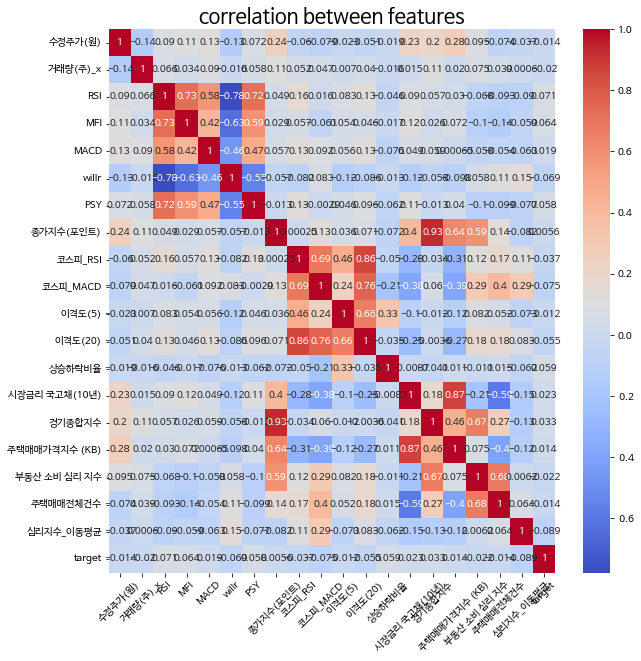

In [ ]:
plt.figure(figsize=(10,10))

heat_table = df.corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=20)
plt.show()

- 비정상적으로 높은 VIF(다중공선성)지수와, 같은 카테고리 내 변수들과 높은 상관관계를 갖는 변수들을 제외하고 최종적으로 모델에 사용할 변수들을 선정
- 제외한 변수 : 모멘텀,월간매매가격지수,코스피PER,코스피PBR,소비자물가지수

### 3) EDA

변수별 분포 확인

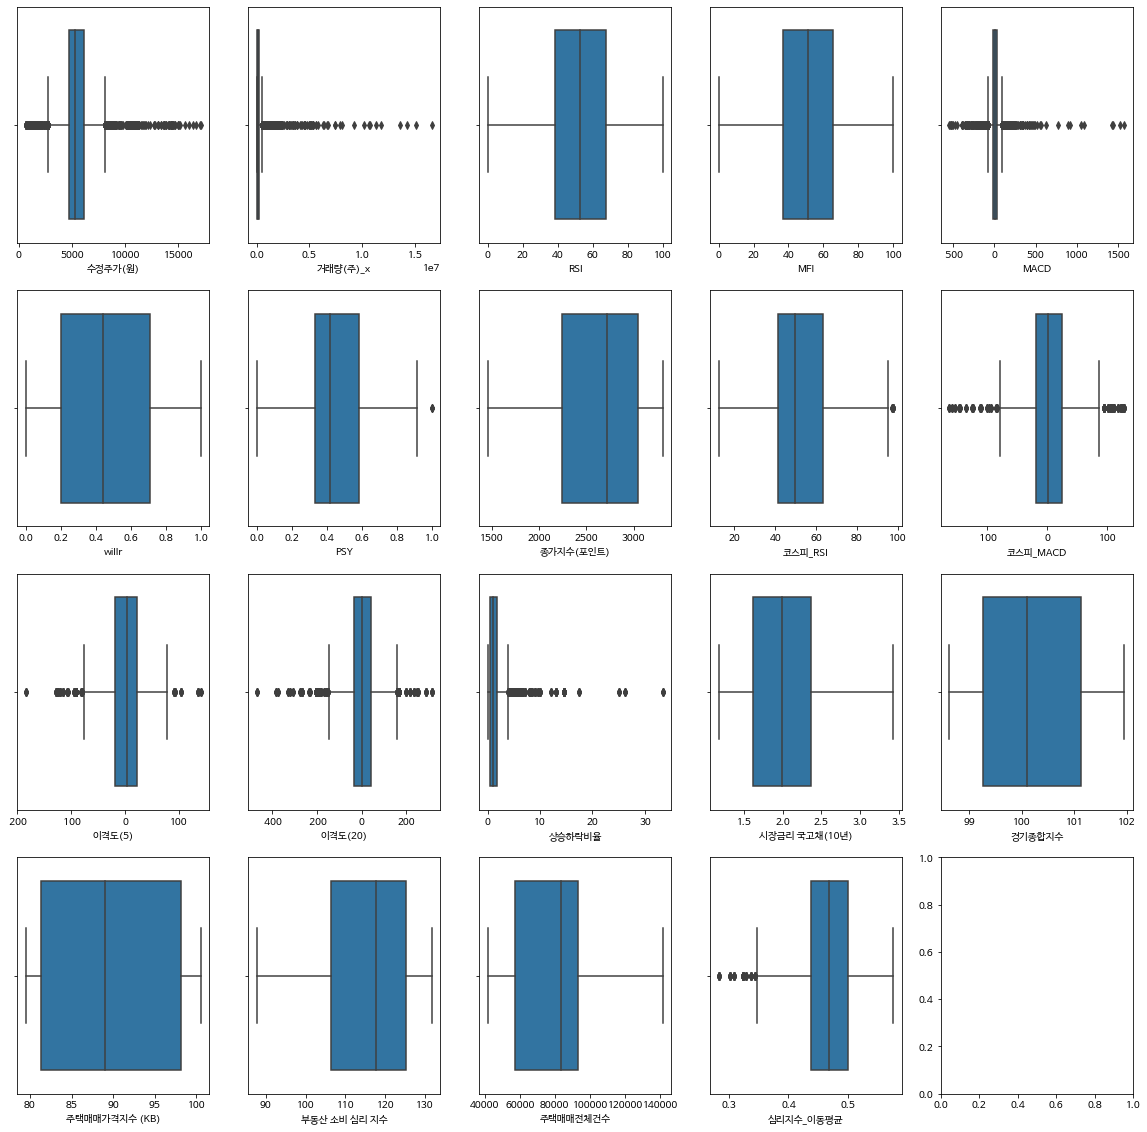

In [ ]:
numeric_variable = ['수정주가(원)','거래량(주)_x','RSI','MFI','MACD','willr','PSY','종가지수(포인트)','코스피_RSI','코스피_MACD','이격도(5)','이격도(20)','상승하락비율','시장금리 국고채(10년)','경기종합지수','주택매매가격지수 (KB)','부동산 소비 심리 지수','주택매매전체건수','심리지수_이동평균']
fig, axes = plt.subplots(4, 5, figsize=(20,20))

for ax,feature in zip(axes.flatten(),numeric_variable):
    sns.boxplot(x= df[feature],hue = df['target'],ax=ax)
plt.show()

## 바. 모델링 

### 1) 모델링 및 최적화

In [ ]:
def get_clf_eval(y_test, model,pred=None): 
    """
    이진분류모델 성능지표
    """
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred) 
    f1 = f1_score(y_test, pred) 
    class_name= model.__class__.__name__
    print()
    print(f'-------{class_name} ------- \n정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1_score: {f1:.4f}')


In [ ]:
## ROC 곡선 시각화
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [ ]:
## 학습 데이터 분리 19년~ 21년 12월까지
train = df[~df.Date.str.startswith('2022')] 
train.set_index(['Date','종목명'],inplace = True)

In [ ]:
## 독립변수,종속변수 분리
X = train.drop(['target'],axis =1)
y = train['target']

In [ ]:
## 학습 및 검증 데이터 분리
train_X,valid_X,train_y,valid_y = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [ ]:
print('학습시킬 train 셋 : ', train_X.shape)
print('검증할 val 셋 : ', valid_X.shape)

학습시킬 train 셋 :  (5392, 19)
검증할 val 셋 :  (1348, 19)


In [ ]:
## 스케일링
mMscaler = MinMaxScaler()
train_X[numeric_variable] = mMscaler.fit_transform(train_X[numeric_variable])
valid_X[numeric_variable] = mMscaler.transform(valid_X[numeric_variable])

In [ ]:
train_X

,,수정주가(원),거래량(주)_x,RSI,MFI,MACD,willr,PSY,종가지수(포인트),코스피_RSI,코스피_MACD,이격도(5),이격도(20),상승하락비율,시장금리 국고채(10년),경기종합지수,주택매매가격지수 (KB),부동산 소비 심리 지수,주택매매전체건수,심리지수_이동평균
Date,종목명,,,,,,,,,,,,,,,,,,,
2021-09-07,이지스레지던스리츠,0.270336,0.001236,0.611111,0.520728,0.262566,0.100000,0.416667,0.936246,0.487535,0.532806,0.543583,0.630616,0.025841,0.572345,0.927928,0.748099,0.879545,0.464333,0.621984
2021-01-12,제이알글로벌리츠,0.265111,0.014627,0.146552,0.152378,0.238714,0.836735,0.166667,0.902975,0.822741,0.980544,0.692085,0.917114,0.027735,0.389166,0.627628,0.307575,1.000000,0.748293,0.880575
2021-02-26,NH프라임리츠,0.215965,0.002174,0.562500,0.601281,0.256345,0.428571,0.416667,0.841814,0.361498,0.583036,0.447972,0.506773,0.005836,0.561654,0.792793,0.419075,0.854545,0.988385,0.754570
2020-08-28,이지스밸류리츠,0.236012,0.008864,0.585938,0.538821,0.260613,0.587302,0.666667,0.485048,0.443895,0.663908,0.569751,0.609326,0.068206,0.223806,0.249249,0.151759,0.761364,0.971003,0.662930
2021-05-18,ESR켄달스퀘어리츠,0.348338,0.016927,0.531151,0.744885,0.258106,0.660617,0.583333,0.928468,0.382736,0.581140,0.641105,0.593953,0.060956,0.674269,0.936937,0.539144,0.736364,0.598775,0.553985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-17,에이리츠,0.289290,0.000326,0.686308,0.791032,0.277346,0.418502,0.666667,0.327289,0.947212,0.616982,0.619930,0.703969,0.039669,0.233785,0.012012,0.000000,0.318182,0.243991,0.681453
2021-02-22,미래에셋맵스리츠,0.246644,0.002032,0.550000,0.585580,0.256399,0.476190,0.416667,0.877969,0.569825,0.658121,0.460578,0.564356,0.019371,0.534569,0.792793,0.419075,0.854545,0.988385,0.846210
2021-04-13,미래에셋맵스리츠,0.257579,0.011454,0.527273,0.246549,0.261629,0.500000,0.416667,0.926319,0.893953,0.656314,0.645790,0.715036,0.039137,0.609408,0.867868,0.479667,0.811364,0.444777,0.764075


#### XGBoost
- XGBoost는 예측을 잘못된 값들에 대해 가중치를 반영하여 다음 모델에 입력으로 넣는 Boosting 기법을 사용하며 병렬학습을 통해 실행 속도가 빠른 알고리즘 방법이다.


In [ ]:
## GridSearchCV로 탐색한 파라미터를 적용한 XGBoost 최적화

xgb_opt = XGBClassifier(random_state = 42,
                      colsample_bytree = 0.75,
                      max_depth = 10,
                      min_child_weight = 1)
                        

xgb_opt.fit(train_X,train_y)
pred_opt = xgb_opt.predict(valid_X)

get_clf_eval(valid_y,xgb_opt,pred_opt)


-------XGBClassifier ------- 
정확도: 0.7537, 정밀도: 0.7519, 재현율: 0.7474, f1_score: 0.7496


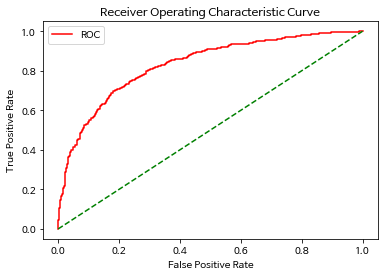

In [ ]:
## ROC 곡선 시각화

prob_xgb = xgb_opt.predict_proba(valid_X)
probs_xgb = prob_xgb[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_xgb)
plot_roc_curve(fper, tper)

In [ ]:
## ROC-AUC 점수

auc_xgb = roc_auc_score(valid_y, xgb_opt.predict_proba(valid_X)[:,1])
auc_xgb

0.8305529563293299

####lightgbm
- lightgbm은 균형을 이뤄 2진 분할을 진행하는 GBM모델에서 발전시켜 리프 중심 트리분할을 사용하여 트리가 깊어지면서 소요되는 시간과 메모리 모두를 절약할 수 있는 알고리즘이다.

In [ ]:
## GridSearchCV로 탐색한 파라미터를 적용한 LightGBM 최적화

lgbm_opt = LGBMClassifier(random_state = 42,
                          learning_rate = 0.2,
                          max_depth = 10,
                          num_leaves = 121)
                        
lgbm_opt.fit(train_X,train_y)
pred_opt = lgbm_opt.predict(valid_X)

get_clf_eval(valid_y,lgbm_opt,pred_opt)


-------LGBMClassifier ------- 
정확도: 0.7611, 정밀도: 0.7587, 재현율: 0.7564, f1_score: 0.7575


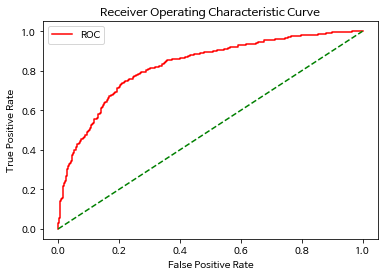

In [ ]:
## ROC 곡선 시각화

prob_lgbm = lgbm_opt.predict_proba(valid_X)
probs_lgbm = prob_lgbm[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_lgbm)
plot_roc_curve(fper, tper)

In [ ]:
## ROC-AUC 점수

auc_lgbm = roc_auc_score(valid_y, lgbm_opt.predict_proba(valid_X)[:,1])
auc_lgbm

0.8253371349310319

#### CatBoost
- CatBoost는 기존 GBM기반 알고리즘들이 가지는 Target Leakage 문제와 범주형 변수 처리문제를 ordering principle과 새로운 범주형 변수 처리 방법으로 해결한다.



In [ ]:
cat = CatBoostClassifier(random_state = 42)
cat.fit(train_X,train_y)
cat_pred = cat.predict(valid_X)

#성능평가
get_clf_eval(valid_y,cat,cat_pred)

Learning rate set to 0.021154
0:	learn: 0.6916057	total: 53.3ms	remaining: 53.2s
1:	learn: 0.6901597	total: 59.5ms	remaining: 29.7s
2:	learn: 0.6881603	total: 65.4ms	remaining: 21.7s
3:	learn: 0.6867614	total: 71.5ms	remaining: 17.8s
4:	learn: 0.6846094	total: 77.5ms	remaining: 15.4s
5:	learn: 0.6831841	total: 83.5ms	remaining: 13.8s
6:	learn: 0.6818636	total: 89.4ms	remaining: 12.7s
7:	learn: 0.6803177	total: 95.3ms	remaining: 11.8s
8:	learn: 0.6791721	total: 101ms	remaining: 11.2s
9:	learn: 0.6779660	total: 107ms	remaining: 10.6s
10:	learn: 0.6768564	total: 114ms	remaining: 10.2s
11:	learn: 0.6758296	total: 119ms	remaining: 9.82s
12:	learn: 0.6742818	total: 125ms	remaining: 9.51s
13:	learn: 0.6729748	total: 131ms	remaining: 9.22s
14:	learn: 0.6716905	total: 137ms	remaining: 8.97s
15:	learn: 0.6704208	total: 143ms	remaining: 8.77s
16:	learn: 0.6696590	total: 149ms	remaining: 8.6s
17:	learn: 0.6682977	total: 155ms	remaining: 8.45s
18:	learn: 0.6671240	total: 161ms	remaining: 8.3s
19:	l

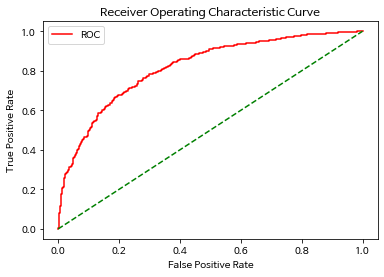

In [ ]:
# ROC 곡선 시각화

prob_cat = cat.predict_proba(valid_X)
probs_cat = prob_cat[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_cat)
plot_roc_curve(fper, tper)

In [ ]:
## ROC-AUC 점수

auc_cat = roc_auc_score(valid_y, cat.predict_proba(valid_X)[:,1])
auc_cat

0.8168165655720562

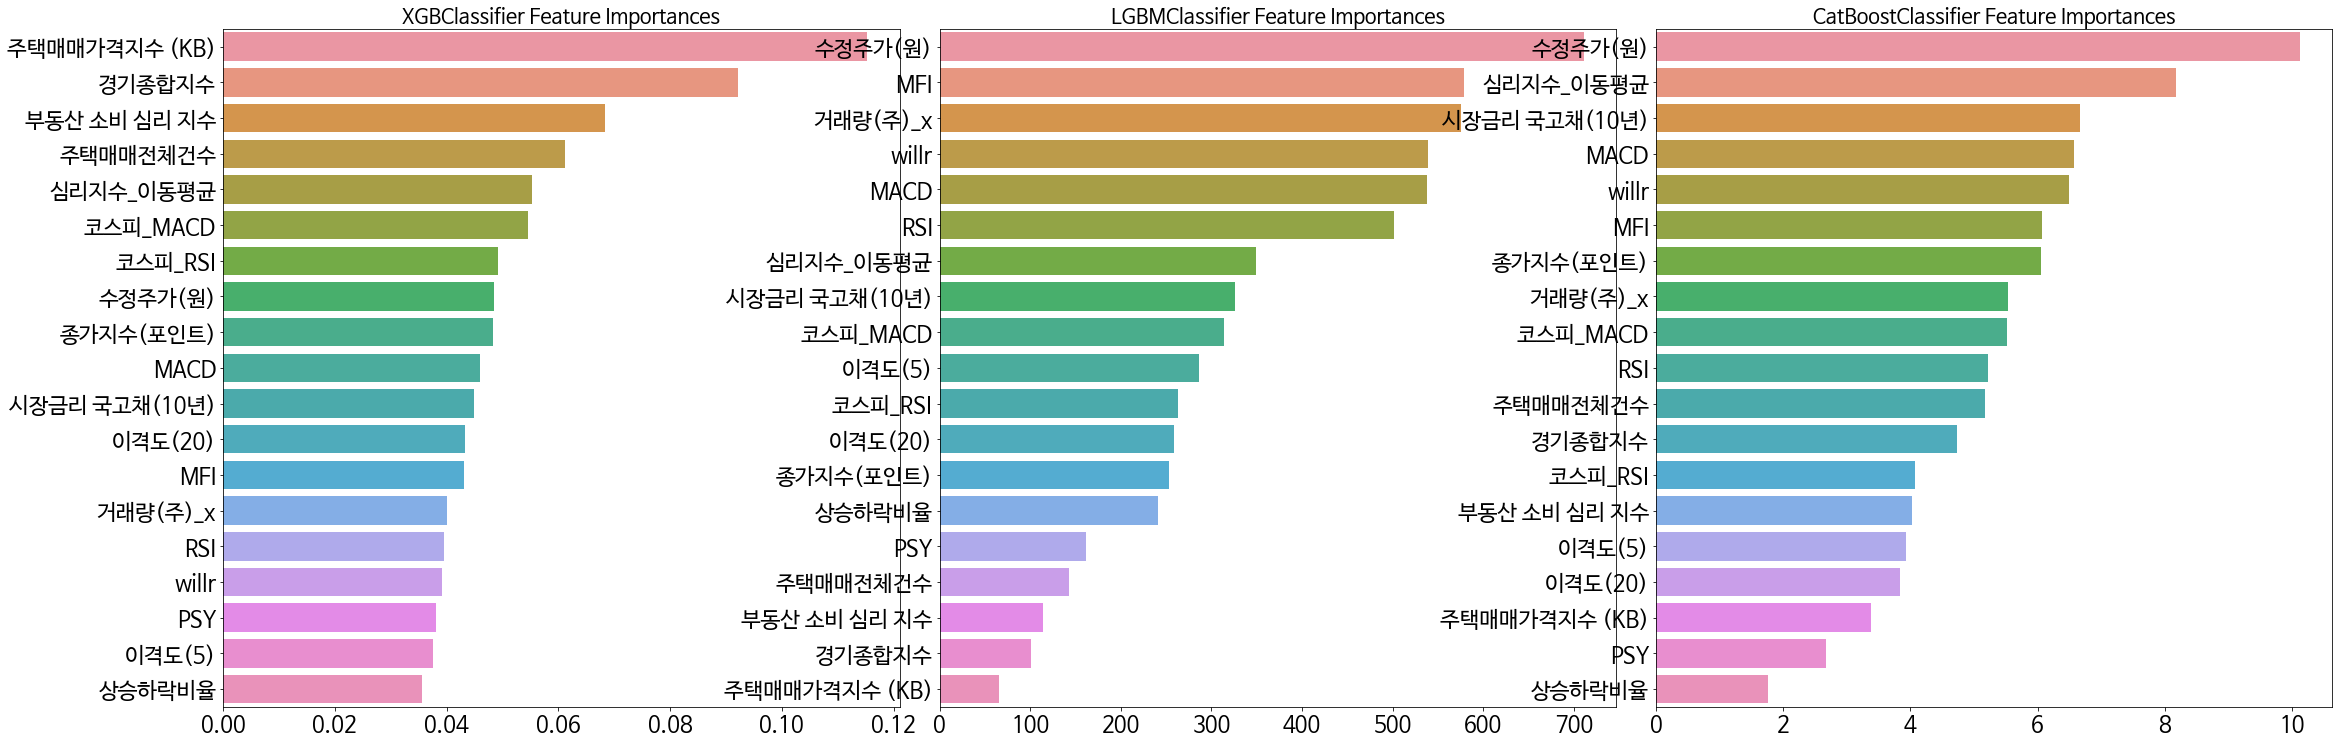

In [ ]:
train_X = pd.DataFrame(train_X , columns = X.columns)
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20
def visualize_ftr_importances(models):
    # 3개 분류 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(30,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=20)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])



models = [xgb_opt,lgbm_opt,cat]
visualize_ftr_importances(models)

### 2) 모델링 성과비교표

- Lightgbm은 적은 데이터에 대한 과적합이 일어나기 쉽다. 본 팀의 데이터는 1만개 이하로 과적합이 일어날 가능성이 있다. 또한,데이터 대부분이 수치형일 경우 CatBoost 알고리즘이 큰 효과를 내기가 어렵다는 단점이 있다. 

- 반면, 정형데이터에서 XGBoost와 같은 tree based 알고리즘이 현재까지는 가장 좋은 알고리즘으로 평가받으며, 분류 성능과 분류속도가 빠르다는 강점과 컴퓨팅 자원 활용 또한 우수하기에 다양한 분야에서 연구되고 있다.
- 실제로, 모델 성능 비교결과 정확도,ROC_score 등 제일 안정적으로 우수한 성능을 보인 XGBoost 모형을 최종 상장리츠 등락 예측 모델로 선정하였다.

<img src = "https://drive.google.com/uc?id=1CDKTdYzr4pStXDiz_nG4cYa99VeTxDBU">

### 3) 설명가능한 인공지능, SHAP
- 머신러닝과 같은 인공지능 분야에서 가장 우선시 되는 것은 '수행한 예측이 얼마나 정확한가?'이다. 그러나 동시에 연구자를 비롯한 이해관계자들은 예측에 대한 명확한 설명을 요구한다.
- 본 연구에서 진행한 모델은 더욱 그런 설명이 절실하다. 리츠 상품에 투자하고자 하는 투자자들은 그들의 언어를 통한 근거가 필요하기 때문이다. 단순히 0과 1 그리고 퍼센티지로 투자를 결정하기엔 불안감이 뒤따르기 마련이다.
- SHAP는 그에 대한 응답이다. 설명 가능한 인공지능 중 하나인 SHAP는 본 연구의 모델이 어떤 과정으로 등락 예측을 이루어냈는지 시각화해 보여준다. 
- SHAP는 게임이론을 바탕으로 하나의 변수에 대한 중요도를 알기 위해 여러 변수의 조합을 구성하고 해당 변수의 유무에 따른 평균적인 변화를 파악한다. 즉, 등락 예측에 어떤 변수가 어떻게 작용했는지 보여주는 것이다. 


In [ ]:
## 개발한 모델(XGBoost)을 SHAP에 적합
shap.initjs()
explainer = shap.TreeExplainer(xgb_opt)
shap_values = explainer.shap_values(valid_X)

In [ ]:
## 개별 데이터 예측 예시 (1) 상승 예측
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[271, :], valid_X.iloc[271, :])

In [ ]:
## 개별 데이터 예측 예시 (2) 하락 예측
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[54, :], valid_X.iloc[54, :])

In [ ]:
## 전체 데이터 예측 결과
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, valid_X)

Output hidden; open in https://colab.research.google.com to view.

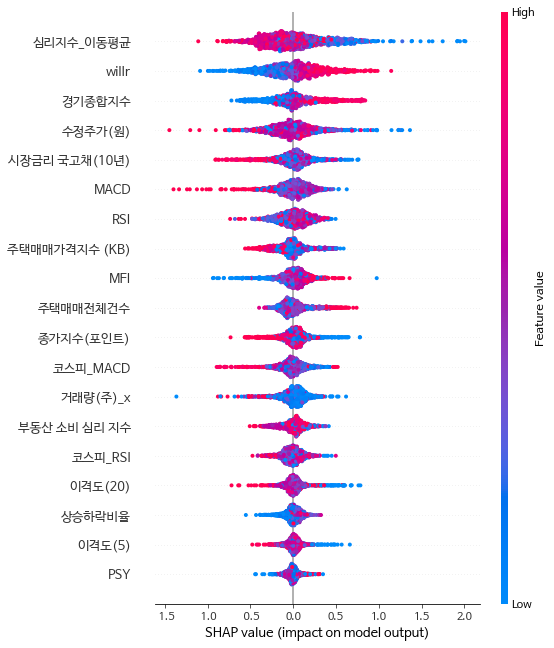

In [ ]:
## 변수 중요도 및 영향
shap.initjs()
shap.summary_plot(shap_values, valid_X)

# 4.예측 모델을 이용한 상장리츠 정보시스템
- 2022년 1월을 데이터를 분리하여 최종 테스트 데이터로 본 팀의 모델을 활용한 비즈니스 컨텐츠 활용 및 서비스 구현하였다.

### 가. 최종 Dashboard 예시
<img src = "https://drive.google.com/uc?id=1sKzehK3Lt-0l8gTJnF2YnX9JsTktFewT">

### 나. 상장리츠 등락예측 및 설명 서비스
[제작 프로세스]
- Shap기법은 본 팀이 사용한 모델(XGBoost)에서 2022년 1월 17일 일자 ‘ESR켄달스퀘어리츠’ 데이터를 0으로 예측한 근거를 설명한다. 
- 이 데이터의 경우 모델이 하락을 예측한 함숫값에 ‘수정주가(원)’, ‘종가지수(포인트)’, ‘RSI’, ‘시장금리 국고채(10년)’ 그리고 ‘부동산 소비 심리 지수’ 순으로 큰 영향을 미쳤음을 알 수 있다. 
또한, 모델이 하락을 예측하는 데에 기여한 것으로 나타난 변수들은 그 값이 작을수록 해당 일자의 리츠 상품에 대해 하락을 예측하는 경향이 존재한다고 의미를 해석할 수 있다.

[기능 및 의의]
- 상장리츠 등락예측의 설명가능성을 제공하는 기능은 매매 전략 수립시 리츠에 대한 일주일 간의 추세에 대한 방향성을 성정하는데 도움을 주며, 단기 투자자의 경우 고점이나 저점 부근에서 반등 혹은 하락 시점을 잡는데 활용할 수 있다.
- 주요 변수의 설명력을 제시하여 투자자가 의사결정의 근거로 활용할 수도 있으며, 추후 리츠를 기반으로 한 레버지리나 인버스 상품 등장 시 리츠와 똑같이 단기매매에 활용할 수 있다는 점에서 의의를 지닌다.


In [ ]:
## 1월 17일자 ESR켄달스퀘어리츠 데이터 추출
test_0 = df.set_index(['Date','종목명'])
test_1 = test_0.loc['2022-01-17', 'ESR켄달스퀘어리츠']

In [ ]:
test_esr = pd.DataFrame(test_1).transpose()
test_esr = test_esr.drop('target', axis=1)

In [ ]:
## 개발한 모델(XGBoost)을 SHAP에 적합
shap.initjs()
explainer = shap.TreeExplainer(xgb_opt)
shap_values = explainer.shap_values(test_esr) 

In [ ]:
## 2022년 1월 17일자 ESR켄달스퀘어리츠 데이터 예측 SHAP

shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[0, :], test_esr.iloc[0, :])

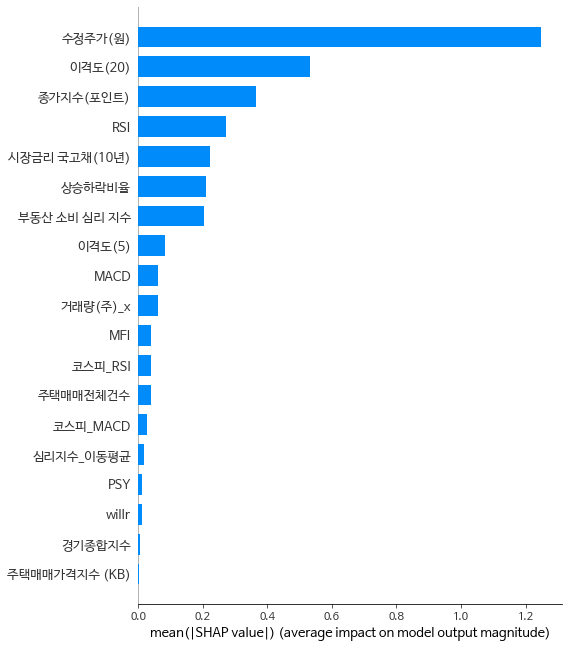

In [ ]:
## 2022년 1월 17일자 ESR켄달스퀘어리츠 데이터 예측에 영향을 미친 변수 설명
shap.initjs()
shap.summary_plot(shap_values, test_esr, plot_type = "bar")

### 다.주단위 상장리츠 변동성 지표

[제작 프로세스]
- 본 팀의 비즈니스 모델인 상장리츠 등락예측을 이용하여 ESR켄달스퀘어리츠의 2022년 1월 17일의 주단위 상장리츠 변동성 지표에 대한 정보시스템을 구현하였으며 과정은 다음과 같다.

- 먼저, 해당리츠의 1월 13일부터 17일까지의 데이터를 바탕으로 다음 일주일 동안의 거래일인 1월 20일 부터 24일까지의 등락예측 서비스를 제공한다. 현재 대시보드에는 모델의 예측값은 20일부터 24일까지 모두 하락으로 예측하였으며 그 추세를 보여주고 있다.

- 다음으로, 해당리츠 상품의 과거 추세인 지난 4주치 예측 히스토리를 보여준다. 구체적으로 1월 17일 부터 이전 한달인 12월 20일까지인 4주치 예측값을 바탕으로 전체리츠시장의 상승예측 및 하락예측 그리고 해당종목의 등락예측에 대해 주마다 5거래일 동안 상승한 비율, 하락한 비율을 제시하는 것이다.

[기능 및 의의] 
- 위의 정보시스템의 기능은 향후 일주일 및 지난 4주치 상승,하락예측 추세를 제시하며, 이를 통해 매매 전략 수립시 4주 동안의 예측 추이를 통해 추세 강화 혹은 약화를 판단하는데 도움을 줄 것이다. 특히 상장된 리츠 전체의 예측 비율을 제시하고 있어 전반적인 리츠 테마군의 흐름을 분석하는데 활용할 수 있는 점에서 의의를 지닌다.

- 추가적으로, 과거 예측 자료를 통해 실제 주가와 예측이 잘 맞는지 체크를 통해 모델이 시기별로 예측력의 변동이 나타날 때 투자자들이 예측치에 대한 충분한 신뢰를 가질 수 있다는 의의를 지닌다.


In [ ]:
train = df[~df.Date.str.startswith('2022')] 
train.set_index(['Date','종목명'],inplace = True)

In [ ]:
X_train = train.drop('target',axis =1)
y_train = train['target']

In [ ]:
X_train[numeric_variable] = mMscaler.fit_transform(X_train[numeric_variable])

In [ ]:
## 모델 학습
xgb_opt = XGBClassifier(random_state = 42,
                      colsample_bytree = 0.75,
                      max_depth = 10,
                      min_child_weight = 1)
                        

xgb_opt.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.75, max_depth=10, random_state=42)

In [ ]:
test = df[df.Date.str.startswith('2022-01')] ## 테스트 데이터
test.set_index(['Date','종목명'],inplace = True)

In [ ]:
## 테스트 데이터 스케일링
test[numeric_variable] = mMscaler.transform(test[numeric_variable])

In [ ]:
## 테스트 데이터 예측
test_target = test.drop('target',axis=1)
xgb_opt_pred = xgb_opt.predict(test_target)
table = pd.DataFrame(xgb_opt_pred)
test_target['target'] = table.values
test_target['true_value'] = test['target'].values

In [ ]:
## 2022년 1월을 예측하여 비즈니스 컨텐츠 제시
month_12 = df[df.Date.str.startswith('2021-12')]
month_1 = test_target.reset_index()
month_12['true_value'] = month_12['target'].values
content_data = pd.concat([month_12,month_1], axis = 0)

In [ ]:
## 유용성 검증 날짜 추출
esr = content_data[content_data['종목명'] == 'ESR켄달스퀘어리츠']
esr.set_index('Date',inplace = True)
except_index = list(esr['2022-01-18':].index)
except_index_2 = list(esr[:'2021-12-12'].index)

In [ ]:
## 전체 리츠에 대한 예측값 추출
content_data['y'] = content_data['Date'].apply(lambda x : 1 if x in except_index or x in except_index_2 else 0)
all_predict = content_data[content_data['y'] == 0].sort_values(by=['종목명','Date'])
all_predict.set_index('Date',inplace = True)
all_predict[['종목명','target','true_value']].to_csv('./drive/MyDrive/krx 빅데이터/전체 예측값.csv',encoding = 'cp949',index = True)

In [ ]:
all_predict

,종목명,수정주가(원),거래량(주)_x,RSI,MFI,MACD,willr,PSY,종가지수(포인트),코스피_RSI,...,상승하락비율,시장금리 국고채(10년),경기종합지수,주택매매가격지수 (KB),부동산 소비 심리 지수,주택매매전체건수,심리지수_이동평균,target,true_value,y
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-13,ESR켄달스퀘어리츠,6370.000000,3.746900e+05,30.158730,20.197095,-43.827185,0.805556,0.250000,3001.660000,50.574591,...,0.698990,2.169000,100.780000,98.14,118.900000,75290.000000,0.407571,1,1,0
2021-12-14,ESR켄달스퀘어리츠,6330.000000,1.656480e+05,30.158730,19.570660,-45.277668,0.911765,0.250000,2987.950000,49.181851,...,0.493031,2.169000,100.780000,98.14,118.900000,75290.000000,0.417286,1,1,0
2021-12-15,ESR켄달스퀘어리츠,6360.000000,9.618300e+04,33.333333,26.801203,-40.208062,0.823529,0.250000,2989.390000,51.216389,...,0.612284,2.166000,100.780000,98.14,118.900000,75290.000000,0.421714,1,1,0
2021-12-16,ESR켄달스퀘어리츠,6380.000000,1.409540e+05,35.820896,28.602338,-32.739265,0.764706,0.333333,3006.410000,60.051139,...,0.975962,2.147000,100.780000,98.14,118.900000,75290.000000,0.437071,1,1,0
2021-12-17,ESR켄달스퀘어리츠,6330.000000,1.138368e+06,36.923077,30.023292,-33.379475,0.911765,0.333333,3017.730000,66.313540,...,1.482558,2.153000,100.780000,98.14,118.900000,75290.000000,0.439714,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-11,코람코에너지리츠,0.353138,2.772961e-03,0.750980,0.614379,0.271390,0.212308,0.666667,0.795499,0.332561,...,0.006734,0.935852,0.555556,1.00,0.543182,0.242052,0.545698,0,0,0
2022-01-12,코람코에너지리츠,0.354353,2.596049e-03,0.730361,0.605851,0.271202,0.160131,0.666667,0.819909,0.416868,...,0.155876,0.895225,0.555556,1.00,0.543182,0.242052,0.558372,0,0,0
2022-01-13,코람코에너지리츠,0.354899,2.859550e-03,0.667539,0.602467,0.271041,0.135135,0.750000,0.814286,0.368007,...,0.027059,0.873129,0.555556,1.00,0.543182,0.242052,0.576164,0,0,0


In [ ]:
test_target[['target','true_value']].to_csv('./drive/MyDrive/krx 빅데이터/1월 결과값.csv',encoding = 'cp949',index = True)

### 라.월별 부동산 뉴스심리지수 그래프
[제작 프로세스]
- 부동산 심리지수의 유용성을 알아보기 위해 리츠의 성격을 보여줄 수 있는 동일가중지수와 부동산의 성격인 주택매매가격지수와의 시각화를 진행하였다.
- 월단위 뉴스심리지수 산출방법은 위에서 진행한 일단위 뉴스(chapter.다)를 월단위로 묶은 뒤 동일한 산출식에 의해 1달동안의 긍정기사/중립기사의 값으로 산출하였다.

[기능 및 의의]
- 본 팀은 20,21년 하반기부터 부동산 뉴스 심리지수가 동일가중지수보다 2~3개월 정도의 선행성을 보여줄 수 있다고 판단하였다.
- 이러한 선행성은 월별로 산출한 뉴스심리지수는 상장리츠 투자자들에게 장기적인 투자의사결정에 도움을 줄 수 있으며, 나아가 부동산 뉴스 심리지수를 이용하여 상장리츠 투자상품의 진입,매도타이밍 등의 선제적인 움직임에 보다 나은 선택권을 제공할 수 있다.
-뉴스 심리지수는 추세 전환 시 쉽게 바뀌지 않는 성질이 있어 반등 혹은 반락 시점을 잡을 수 있으며 금융안에서의 평가와 다른 실제 경기에서 사람들이 가지는 리츠에 대한 심리 및 평가를 판단할 수 있다는 점에서 의의를 지닌다.


In [ ]:
keyword_center = ['수요','투자','선호','경기','거래','가치','매매','임대료','수익','이익','수익률','건설','건축','착공','시공','가격','매매가','전세가','분양가','전망','예측']
positive_word = ['강세','강화','유망','호재','증가','확대','급등','개선','상승','인기','활황','집중','반등']
negative_word = ['약세','실망','하락','급락','감소','축소','위험','최저','위축','충격','약화','둔화','침체']

year = ['2019','2020','2021','2022']
sector_name = ['섹터_주택','섹터_물류','섹터_오피스','섹터_리테일']
주택뉴스심리지수 = []
date = []
주택심리지수 = []
물류심리지수 = []
오피스심리지수 = []
리테일심리지수 = []
for sector in sector_name: ##섹터별 키워드 설정
  if sector == '섹터_주택' :
    keyword_head = ['주택','아파트','주거','오피스텔','부동산','상업용']
  elif sector == '섹터_물류':
    keyword_head = ['물류','물류센터','저온창고','상온창고','부동산','상업용']
  elif sector == '섹터_오피스':
    keyword_head = ['오피스','빌딩','상업용 빌딩','업무용 빌딩','부동산','상업용']
  else:
    keyword_head = ['리테일','백화점','몰','쇼핑센터','부동산','상업용']
  for y in year:
    path_dir = './drive/MyDrive/krx 빅데이터/월별 뉴스 크롤링 데이터/' + sector + '/'+ y
    file_list = sorted(os.listdir(path_dir))
    for file in file_list:
      df = pd.read_csv(path_dir + '/'  + file)  
      df.dropna(axis =0,inplace=True)
      mask = df['title'].str.contains('인사')
      df = df[~mask]

      positive_news_cnt = 0
      negative_news_cnt = 0
      neutral_news_cnt = 0
      for corpus in df['content']:

        corpus = corpus.split("다.")
        sentence = []
        for i in keyword_head: ## 해당 기사의 문장 중 첫번째 단어군 중 하나라도 포함하는지
          for j in corpus: 
            if i in j:
              sentence.append(j) 
        sentence_2 = []
        result_positive = []
        for i in keyword_center: ## 추출된 문장들이 두번째 단어군 중 하나라도 포함하는지
          for j in sentence:
            if (i in j) and (j not in sentence_2):
              sentence_2.append(j)

        for i in sentence_2:   ## 또 추출된 문장에서 부정적단어는 없으면서 긍정적 단어가 존재하는지
          for n in negative_word:
            if n in i:
              break
          else:
            for p in positive_word:
              if (p in i) and (i not in result_positive) :
                result_positive.append(i)
        
        
        result_negative = []   ## 추출된 문장에서 긍정적단어는 없으면서 부정적 단어가 존재하는지
        for i in sentence_2:
          for p in positive_word:
            if p in i:
              break
          else:
            for n in negative_word:
              if (n in i) and (i not in result_negative):
                result_negative.append(i)

        if result_positive : ## 기사에 긍정적 문장이 하나라도 있다면 긍정뉴스로 +1
          positive_news_cnt +=1
        if result_negative : ## 기사에 부정적 문장이 하나라도 있다면 부정뉴스로 +1
          negative_news_cnt +=1
        if sentence_2:
          neutral_news_cnt += 1

      if neutral_news_cnt == 0:
        ans = 0
        if sector == '섹터_주택' :
          주택심리지수.append(ans)
        elif sector == '섹터_물류':
          물류심리지수.append(ans)
        elif sector == '섹터_오피스':
          오피스심리지수.append(ans)
        else:
          리테일심리지수.append(ans)
      else:
        ans = round(positive_news_cnt/(neutral_news_cnt),3)

        if sector == '섹터_주택' :
          주택심리지수.append(ans)
        elif sector == '섹터_물류':
          물류심리지수.append(ans)
        elif sector == '섹터_오피스':
          오피스심리지수.append(ans)
        else:
          리테일심리지수.append(ans)





news_month_df = pd.DataFrame({'주택뉴스심리지수': 주택심리지수, '오피스뉴스심리지수': 오피스심리지수, '리테일뉴스심리지수': 리테일심리지수,'물류뉴스심리지수':물류심리지수})

In [ ]:
date_index = pd.date_range("2019.1.1", "2022.5.31",freq = "M")
date_index = date_index.strftime("%Y-%m-%d")

news_month_df = pd.DataFrame({'Date':date_index,'주택뉴스심리지수': 주택심리지수, '오피스뉴스심리지수': 오피스심리지수, '리테일뉴스심리지수': 리테일심리지수,'물류뉴스심리지수':물류심리지수})

In [ ]:
def mean(df):
  if df['Date'][:4] == '2019':
    return round(df['주택뉴스심리지수']*0.6010 + df['오피스뉴스심리지수']*0.2806 + df['리테일뉴스심리지수']*0.0999+ df['물류뉴스심리지수']*0.0185,3)
  elif df['Date'][:4] == '2020':
    return round(df['주택뉴스심리지수']*0.6341 + df['오피스뉴스심리지수']*0.2535 + df['리테일뉴스심리지수']*0.0926+ df['물류뉴스심리지수']*0.0198,3) 
  elif df['Date'][:4] == '2021':
    return round(df['주택뉴스심리지수']*0.6111 + df['오피스뉴스심리지수']*0.2472 + df['리테일뉴스심리지수']*0.1260+ df['물류뉴스심리지수']*0.0158,3)
  else: 
    return round(df['주택뉴스심리지수']*0.5628 + df['오피스뉴스심리지수']*0.2787 + df['리테일뉴스심리지수']*0.1043+ df['물류뉴스심리지수']*0.0543,3)
news_month_df['부동산심리지수'] = news_month_df.apply(mean,axis=1)

In [ ]:
plus = pd.read_excel("./drive/MyDrive/krx 빅데이터/동일가중/부동산및거시지표.xlsx",sheet_name = "통합",index_col = 0)
dataset2 = pd.read_excel('./drive/MyDrive/krx 빅데이터/동일가중/지표.xlsx',sheet_name = "종합", index_col = 0)

In [ ]:
news_month_df['동일가중지수'] = dataset2['동일가중지수'].values
news_month_df['주택매매가격지수'] = plus['주택매매가격지수'].values[:41]

In [ ]:
news_month_df['동일가중지수(누적)'] = 100
for i in range(1,len(news_month_df)):
  news_month_df.loc[i, '동일가중지수(누적)'] = news_month_df.loc[i-1, '동일가중지수(누적)'] + ((news_month_df.loc[i-1, '동일가중지수(누적)'] * ((news_month_df.loc[i ,'동일가중지수'] - news_month_df.loc[i-1 ,'동일가중지수']) / news_month_df.loc[i-1 ,'동일가중지수'])))

In [ ]:
df_average = news_month_df['부동산심리지수'].rolling(window = 3).mean()
news_month_df['심리지수_이동평균'] = df_average.values
news_month_df

,Date,주택뉴스심리지수,오피스뉴스심리지수,리테일뉴스심리지수,물류뉴스심리지수,부동산심리지수,동일가중지수,주택매매가격지수,동일가중지수(누적),심리지수_이동평균
0,2019-01-31,0.562,0.444,0.306,0.356,0.500,1000.000000,79.877,100.000000,NaN
1,2019-02-28,0.400,0.401,0.381,0.435,0.399,988.488942,79.824,98.848894,NaN
2,2019-03-31,0.415,0.442,0.349,0.387,0.415,991.200004,79.740,99.120000,0.438000
3,2019-04-30,0.526,0.496,0.295,0.347,0.491,1017.674152,79.630,101.767415,0.435000
4,2019-05-31,0.430,0.364,0.351,0.367,0.402,1030.505966,79.577,103.050597,0.436000
5,2019-06-30,0.524,0.448,0.443,0.347,0.491,1069.712486,79.508,106.971249,0.461333
6,2019-07-31,0.526,0.364,0.360,0.317,0.460,1070.667584,79.502,107.066758,0.451000
7,2019-08-31,0.467,0.396,0.442,0.387,0.443,1091.169964,79.546,109.116996,0.464667
8,2019-09-30,0.576,0.484,0.429,0.450,0.533,1130.608910,79.589,113.060891,0.478667
9,2019-10-31,0.555,0.448,0.400,0.373,0.506,1172.409722,79.664,117.240972,0.494000


In [ ]:
news_month_df = news_month_df.iloc[:36] ## 22년1월까지의 그래프

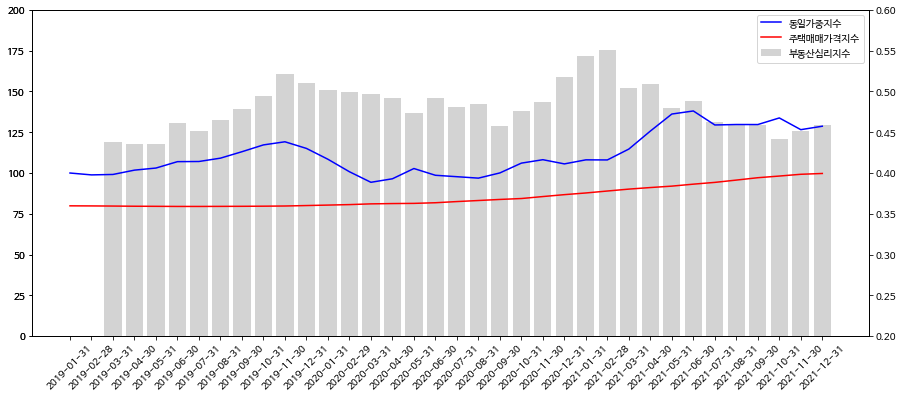

In [ ]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot()
xs = news_month_df['Date'].to_list()
ax1.plot(news_month_df['Date'],news_month_df['동일가중지수(누적)'] ,color = 'b',label = '동일가중지수')
plt.xticks(ticks = xs, labels = xs,rotation = 45)
plt.ylim([0,200])
ax2 = ax1.twinx()
ax2.plot(news_month_df['Date'],news_month_df['주택매매가격지수'],color = 'r',label = '주택매매가격지수')
plt.ylim([0,200])

ax3 = ax2.twinx()

ax3.bar(news_month_df['Date'],news_month_df['심리지수_이동평균'] ,color = 'lightgray',label = '부동산심리지수')
plt.ylim([0.2,0.6])

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax2.set_zorder(ax3.get_zorder() + 10)
ax2.patch.set_visible(False)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()